# 데이터 시각화 핵심 요약

이 문서는 데이터 시각화의 주요 라이브러리(Matplotlib, Seaborn, Plotly, Altair)와 Streamlit을 사용한 대시보드 제작의 핵심 개념을 요약정리합니다. 각 주제별로 개념, 핵심 내용, 그리고 코드 예제를 포함하고 있으며, 코드에는 상세한 주석을 추가하여 이해를 돕습니다.

---

## 1. 로드맵 & 도구 고르기

### 개념
- **목적에 따른 도구 선택**: 시각화의 목적이 탐색형 분석(EDA)인지, 아니면 리포트/발표를 위한 설명형인지에 따라 사용하는 도구와 차트의 종류가 달라집니다.
- **주요 라이브러리 스택**:
    - **Matplotlib**: 가장 기본이 되는 로우레벨(low-level) 라이브러리로, 세밀한 제어와 출판 품질의 정적 이미지 생성에 강점이 있습니다.
    - **Seaborn**: Matplotlib 기반의 통계 시각화 라이브러리로, 일관된 테마와 간결한 코드로 높은 생산성을 제공합니다.
    - **Plotly**: 인터랙티브(interactive)한 차트 제작에 특화되어 있으며, 줌/팬, 툴팁 등 동적인 기능을 쉽게 구현하고 웹에 공유하기 좋습니다.
    - **Altair**: 선언형 문법(Grammar of Graphics)을 사용하여, 코드가 짧고 재현성이 높은 차트를 정의합니다.
- **시각화 파이프라인**: `데이터 준비 → 차트 종류 선택 → 스타일/색상 지정 → 주석/레이블 추가 → 검증 → 배포(이미지, HTML, 앱)`의 과정을 따릅니다.

### 핵심 내용
- **EDA (탐색적 데이터 분석)**: 히스토그램, 산점도, 라인 플롯 같은 기본 차트와 여러 그룹을 한 번에 비교하는 파셋(facet) 기능을 활용하여 데이터의 패턴을 빠르게 확인합니다.
- **설명형 시각화**: 독자의 이해를 돕기 위해 레이블, 주석, 색상 등을 일관성 있게 사용하고, 최종 결과물을 어떤 포맷(PNG, SVG, HTML 등)으로 저장하고 공유할지 처음부터 결정하는 것이 중요합니다.
- **협업과 재현성**: 여러 사람이 함께 작업하거나 나중에 동일한 차트를 다시 만들기 위해, 코드 스니펫, 공통 테마, 폰트 등을 통일하여 관리합니다.

---

## 2. Matplotlib 기본 - Figure / Axes

### 개념
- **Figure와 Axes**:
    - `Figure`: 전체 캔버스(그림)에 해당하며, 여러 개의 차트를 담을 수 있는 최상위 컨테이너입니다.
    - `Axes`: 실제 차트가 그려지는 영역으로, 축(axis), 눈금(tick), 레이블(label) 등을 포함하는 하나의 플롯(plot) 단위입니다.
- **객체지향 인터페이스**: `plt.subplots()`를 사용하여 Figure와 Axes 객체를 생성하고, 반환된 `ax` 객체의 메서드를 호출하여 차트의 모든 요소를 명시적으로 제어하는 방식이 권장됩니다.
- **저장**: `fig.savefig()`를 사용하여 생성된 차트를 출판 품질의 정적 이미지 파일로 저장할 수 있습니다. `dpi`로 해상도를, `bbox_inches='tight'`로 여백을 조절합니다.

### 핵심 내용
- **주요 파라미터**: `figsize` (Figure 크기), `dpi` (해상도), `layout='constrained'` (레이아웃 자동 조절) 등이 자주 사용됩니다.
- **라인 속성**: `lw` (선 두께), `ls` (선 스타일), `marker` (표식), `color` (색상) 등으로 라인의 스타일을 지정합니다.
- **축/라벨/범례**: `ax.set()`으로 축 레이블과 제목을 한 번에 설정하고, `ax.grid(True)`로 그리드를, `ax.legend()`로 범례를 표시합니다.

### 코드 예제


/tmp/ipython-input-2270344922.py:27: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.savefig('line_basic.png', dpi=200, bbox_inches='tight')
/tmp/ipython-input-2270344922.py:27: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.savefig('line_basic.png', dpi=200, bbox_inches='tight')
/tmp/ipython-input-2270344922.py:27: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig('line_basic.png', dpi=200, bbox_inches='tight')
/tmp/ipython-input-2270344922.py:27: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.savefig('line_basic.png', dpi=200, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 

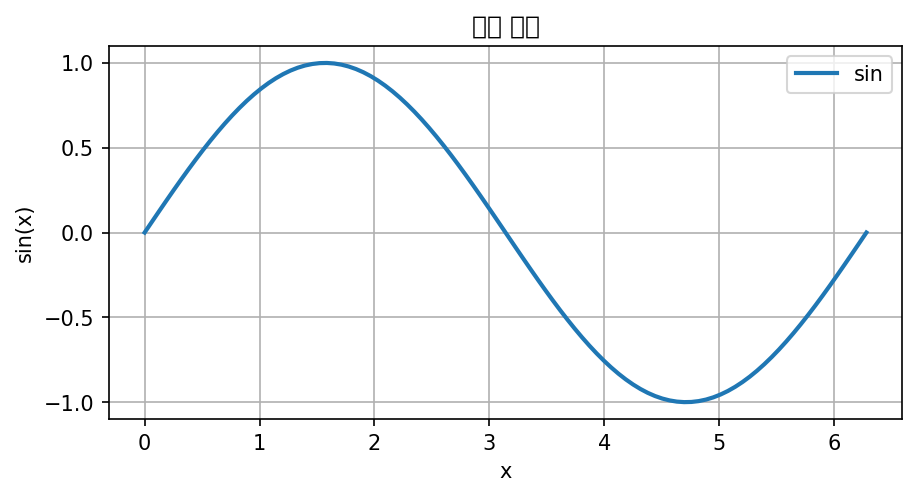

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Figure와 Axes 객체 생성
# figsize: 가로 6, 세로 3.2인치 크기
# dpi: 인치당 150픽셀 해상도
# layout='constrained': 제목, 레이블 등이 겹치지 않게 자동 조절
fig, ax = plt.subplots(figsize=(6, 3.2), dpi=150, layout='constrained')

# 데이터 플로팅
# lw: 선 두께, ls: 선 스타일, label: 범례에 표시될 이름
ax.plot(x, y, lw=2, ls='-', marker=None, color='C0', label='sin')

# 차트의 제목과 x, y축 레이블 설정
ax.set(xlabel='x', ylabel='sin(x)', title='라인 기본')

# 그리드와 범례 표시
ax.grid(True)
ax.legend()

# 차트를 이미지 파일로 저장
# bbox_inches='tight'는 그림의 모든 요소가 잘리지 않게 여백을 조절합니다.
fig.savefig('line_basic.png', dpi=200, bbox_inches='tight')



---

## 3. Seaborn 기본 - 테마 & 통계 시각화

### 개념
- **테마 설정**: `sns.set_theme()`을 사용하여 차트의 전반적인 스타일(style), 색상 팔레트(palette), 컨텍스트(context: 'talk', 'paper' 등)를 설정하여 일관된 미학을 유지합니다.
- **공통 인터페이스**: 대부분의 Seaborn 함수는 `data`, `x`, `y`, `hue`(색상 구분), `col`/`row`(열/행 분할), `style`(스타일 구분), `size`(크기 구분) 등 일관된 파라미터 구조를 가집니다.
- **자동 집계/오차**: 데이터를 전달하면 내부적으로 통계적 집계와 신뢰구간(오차) 표시가 기본적으로 제공되어 탐색적 분석 속도가 빠릅니다.

### 핵심 내용
- **관계 시각화**: `relplot`, `lineplot`, `scatterplot`으로 두 변수 간의 관계를 시각화합니다.
- **범주형 데이터 시각화**: `catplot`, `barplot`, `boxplot` 등으로 범주에 따른 통계량을 비교합니다.
- **분포 시각화**: `histplot`, `kdeplot`, `ecdfplot`으로 데이터의 분포를, `heatmap`으로 행렬 데이터를 시각화합니다.
- **파셋(Facet)**: `FacetGrid`나 `relplot`, `catplot`의 `col`, `row`, `hue` 인자를 사용하여 여러 조건별로 차트를 분할하여 비교를 용이하게 합니다.

### 코드 예제


[Text(0.5, 1.0, '펭귄 부리 길이 vs 깊이')]

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54189 (\N{HANGUL SYLLABLE PENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44484 (\N{HANGUL SYLLABLE GWIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) miss

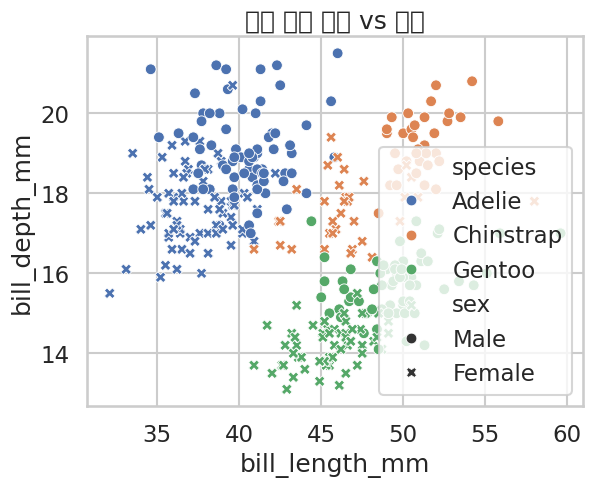

In [2]:
import seaborn as sns
import pandas as pd

# Seaborn의 기본 테마 설정
# style='whitegrid': 흰색 배경에 그리드
# context='talk': 발표 자료에 적합한 크기의 폰트와 선 굵기
sns.set_theme(style='whitegrid', context='talk')

# 'penguins' 예제 데이터셋 로드 및 결측치 제거
df = sns.load_dataset('penguins').dropna()

# 산점도(scatterplot) 그리기
# data=df: 사용할 데이터프레임
# x, y: x축과 y축에 매핑할 컬럼
# hue: 'species' 컬럼 값에 따라 점의 색상을 다르게 함
# style: 'sex' 컬럼 값에 따라 점의 모양을 다르게 함
# s: 점의 크기
ax = sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm',
                     hue='species', style='sex', s=60)

# 차트 제목 설정
ax.set(title='펭귄 부리 길이 vs 깊이')



---

## 4. Plotly Express 기본 - 인터랙티브 차트

### 개념
- **인터랙션 기본 제공**: 마우스 오버 시 나타나는 툴팁, 줌/팬, 특정 계열 토글 등 다양한 대화형 기능이 기본적으로 제공됩니다.
- **간결한 API**: `plotly.express` (보통 `px`로 사용)는 `px.line`, `px.scatter`, `px.bar` 등 간결하고 직관적인 API로 빠른 프로토타입 제작을 지원합니다.
- **웹 공유**: `fig.write_html('chart.html')`을 사용하여 차트를 단일 HTML 파일로 쉽게 저장하고 배포할 수 있습니다.

### 핵심 내용
- **주요 파라미터**: `color`, `symbol`, `size`로 데이터의 차원을 시각적 요소에 매핑하고, `facet_row`/`facet_col`로 차트를 분할하며, `animation_frame`으로 시간에 따른 변화를 애니메이션으로 표현할 수 있습니다.
- **레이아웃 제어**: `fig.update_layout()`을 사용하여 차트의 제목, 범례, 여백(margin) 등 전체적인 스타일을 통제합니다.
- **축/트레이스 제어**: `fig.update_xaxes`/`update_yaxes`로 각 축의 속성을, `fig.update_traces()`로 그려진 각 데이터 계열(trace)의 속성을 세밀하게 조정할 수 있습니다.

### 코드 예제


In [4]:
import plotly.express as px

# 'gapminder' 예제 데이터에서 2007년 데이터만 필터링
df = px.data.gapminder().query("year == 2007")

# 인터랙티브 산점도 생성
fig = px.scatter(
    df,
    x='gdpPercap', y='lifeExp',      # x, y축 변수
    color='continent',              # 대륙별로 색상 구분
    size='pop', size_max=60,        # 인구수에 따라 점 크기 조절
    hover_name='country',           # 마우스 오버 시 국가 이름 표시
    log_x=True,                     # x축을 로그 스케일로
    title='GDP vs LifeExp (2007)'   # 차트 제목
)

# 레이아웃 업데이트: 좌/우/상/하 여백(margin) 조절
fig.update_layout(margin=dict(l=20, r=20, t=40, b=20))

# 차트를 HTML 파일로 저장
# include_plotlyjs='cdn': Plotly JavaScript 라이브러리를 CDN에서 불러오도록 설정
fig.write_html('gapminder_2007.html', include_plotlyjs='cdn')


fig.show()



---

## 5. Altair 기본 - 선언형 문법 (Grammar of Graphics)

### 개념
- **선언형 정의**: "무엇을 그릴지"를 데이터, 마크(mark), 인코딩(encoding)의 조합으로 선언적으로 정의합니다. 코드가 짧고 직관적이며 재현성이 높습니다.
- **파이프라인 기술**: `transform_*` (데이터 변환), `facet` (분할), `repeat` (반복) 등의 메서드를 체이닝하여 데이터 처리 파이프라인을 명확하게 기술할 수 있습니다.
- **대화형 기능**: `.interactive()`를 호출하는 것만으로 기본적인 줌/팬 기능을 추가할 수 있으며, `selection`, `condition` 등을 조합하여 복잡한 인터랙션(브러싱, 하이라이팅 등)을 만들 수 있습니다.

### 핵심 내용
- **기본 구조**: `alt.Chart(df).mark_*().encode(...)` 형태가 기본 구조입니다.
    - `Chart(df)`: 사용할 데이터프레임을 지정합니다.
    - `mark_*()`: 데이터를 표현할 시각적 마크(예: `mark_circle`, `mark_bar`)를 선택합니다.
    - `encode(...)`: 데이터 컬럼을 시각적 속성(예: `x`, `y`, `color`, `tooltip`)에 매핑합니다.
- **스케일/축 제어**: `encode` 내에서 `alt.X('col', scale=alt.Scale(...), axis=alt.Axis(...))` 형태로 스케일과 축의 속성(타입, 범위, 포맷, 제목 등)을 제어합니다.
- **행/열 분할**: `facet(row='col')` 또는 `repeat(['col1', 'col2'])`를 사용하여 여러 그룹의 차트를 나란히 배열하는 스몰 멀티플(small multiples)을 구성합니다.

### 코드 예제


In [7]:
import altair as alt
from vega_datasets import data

# 'cars' 예제 데이터셋 로드
cars = data.cars()

# 선언형 문법으로 차트 생성
chart = (
    alt.Chart(cars)
    .mark_circle(size=60)  # 원형 마크 사용
    .encode(
        # x축에 'Horsepower' 컬럼을 매핑, 스케일은 선형(linear)으로 지정
        x=alt.X('Horsepower', scale=alt.Scale(type='linear')),
        # y축, 색상, 툴팁에 각각 컬럼 매핑
        y='Miles_per_Gallon',
        color='Origin',
        tooltip=['Name', 'Year']
    )
    .properties(
        width=500, height=280,  # 차트 크기 설정
        title='마력 vs 연비'      # 차트 제목 설정
    )
    .interactive()  # 줌/팬 인터랙션 추가
)

# 차트를 HTML 파일로 저장
chart.save('altair_cars.html')

chart.show()

alt.Chart(...)



---

## 6. 축·스케일·좌표계

### 개념
- **스케일(Scale)**: 데이터 값을 시각적 속성(위치, 크기, 색상)으로 어떻게 매핑할지 결정합니다. `linear`(선형), `log`(로그), `symlog`(대칭 로그), `categorical`(범주형) 등이 있습니다.
- **축(Axis)**: 스케일을 시각적으로 표현하는 요소로, 한계(limits), 눈금(ticks), 레이블 포맷 등을 명시하여 가독성을 높입니다.
- **좌표계(Coordinate System)**: 데이터가 그려지는 공간을 정의합니다. 대부분 데카르트(Cartesian) 좌표계를 사용하지만, `polar`(극좌표), 지리(geographic) 좌표계 등 도메인에 맞는 좌표계를 선택할 수 있습니다.

### 핵심 내용
- **로그 스케일**: 데이터의 범위가 매우 넓거나 비율 변화가 중요할 때 사용합니다. 단, 로그 축은 값이 모두 양수일 때만 안전하며, 0이나 음수가 포함된 경우 `symlog`나 데이터 변환을 먼저 고려해야 합니다.
- **눈금(Tick) 제어**: 눈금 간격이나 개수를 자동으로 두기보다 `MaxNLocator`(최대 개수 지정)나 포맷터(`FuncFormatter`)를 사용하여 "10k", "1M"처럼 의미 있는 단위로 표현하는 것이 좋습니다.
- **데이터 변환 vs 스케일 변환**: `np.log(data)`처럼 데이터를 직접 변환하여 플로팅하는 것과, `ax.set_xscale('log')`처럼 스케일만 변경하는 것을 명확히 구분해야 합니다. 후자는 축 눈금에 원래 값이 표시되는 장점이 있습니다.

### 코드 예제


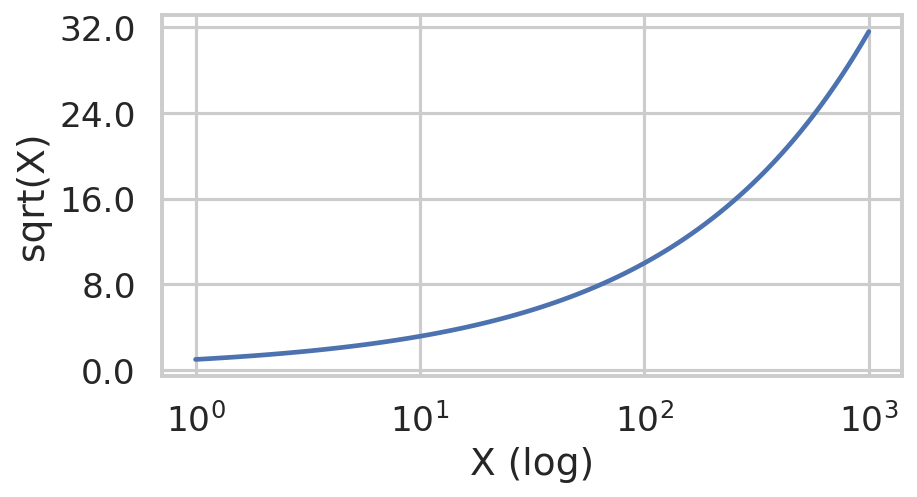

alt.Chart(...)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
import pandas as pd # Altair에서 DataFrame을 사용하기 위해 pandas 임포트

# 로그 스케일에 적합한 데이터 생성
x = np.logspace(0, 3, 100)  # 10^0부터 10^3까지 100개
y = np.sqrt(x)

fig, ax = plt.subplots(figsize=(6, 3.2), dpi=150, layout='constrained')
ax.plot(x, y)

# x축을 로그 스케일로 설정하고 레이블 지정
ax.set(xscale='log', xlabel='X (log)', ylabel='sqrt(X)')

# y축의 주 눈금(major tick) 개수를 최대 5개로 제한
ax.yaxis.set_major_locator(MaxNLocator(5))
# y축의 주 눈금 레이블을 소수점 첫째 자리까지 표시하도록 포맷 지정
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:.1f}"))

plt.show()


# Plotly 예시: 로그 스케일 축 설정
import plotly.express as px
fig2 = px.line(x=x, y=y)
# update_xaxes(type='log')를 사용하여 x축을 로그 스케일로 설정
fig2.update_xaxes(type='log')
fig2.show()

# Altair 예시: 로그 스케일 축 설정
import altair as alt
# Altair는 DataFrame을 사용하므로 pandas DataFrame으로 변환
chart_altair = alt.Chart(pd.DataFrame({'x': x, 'y': y})).mark_line().encode(
    # alt.X() 내에서 scale=alt.Scale(type='log')를 사용하여 x축 로그 스케일 설정
    x=alt.X('x', scale=alt.Scale(type='log')),
    y='y'
)
chart_altair.show()



---

## 7. 색상 설계 - 팔레트·컬러맵

### 개념
- **용도 구분**:
    - **연속형(Sequential)**: 낮은 값에서 높은 값으로 순차적으로 변하는 데이터 (예: `viridis`, `Blues`)
    - **발산형(Diverging)**: 중간값을 기준으로 양쪽으로 갈라지는 데이터 (예: 긍정/부정, `RdBu`)
    - **범주형(Categorical)**: 서로 구분되는 카테고리를 나타내는 데이터 (예: `tab10`, `colorblind`)
- **색각 이상 친화 팔레트**: `viridis`, `cividis`, `colorblind` 등 색각 이상이 있는 사람도 구분할 수 있는 팔레트를 우선적으로 검토합니다.
- **수치 매핑**: 컬러맵으로 수치 데이터를 매핑할 때는 `vmin`/`vmax`로 색상의 범위를 고정하고, 필요 시 `log`/`power` 정규화를 함께 설계하여 값의 분포를 효과적으로 표현합니다.

### 핵심 내용
- **레인보우 컬러맵 지양**: `jet`, `rainbow` 같은 레인보우 컬러맵은 색상의 변화가 균일하지 않아 값의 왜곡을 유발할 수 있습니다. 연속형 데이터에는 `viridis` 계열, 발산형 데이터에는 `RdBu`, `BrBG` 등을 사용하는 것이 좋습니다.
- **범주형 색상**: 범주형 팔레트는 8~10색 이내로 유지하는 것이 좋습니다. 카테고리가 이보다 많아지면 색상 구분이 어려워지므로, 그룹화나 파셋(facet)으로 차트를 분할하는 것을 고려해야 합니다.
- **의미 있는 색상**: '경고=빨강', '안전=초록', '음수=파랑'처럼 사회적으로 통용되는 의미를 색상에 일관되게 부여하여 해석을 돕습니다.

### 코드 예제


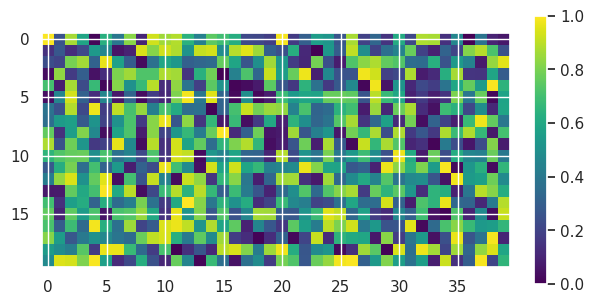

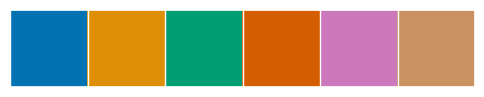

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Matplotlib: 연속형 컬러맵
img = np.random.rand(20, 40)
fig, ax = plt.subplots(layout='constrained', figsize=(6, 3))
im = ax.imshow(img, cmap='viridis', vmin=0, vmax=1)
fig.colorbar(im, ax=ax) # 컬러바 추가
plt.show()

# Seaborn: 범주형 팔레트
sns.set_theme()
# 'colorblind' 팔레트에서 6개의 색상을 가져옴
pal = sns.color_palette('colorblind', 6)
sns.palplot(pal) # 팔레트 시각화

# Plotly: 컬러 스케일
# color 값에 따라 'Viridis' 스케일이 적용됨
fig_plotly = px.scatter(x=[1, 2, 3], y=[1, 4, 9], color=[0.2, 0.5, 0.9],
                        color_continuous_scale='Viridis')
fig_plotly.show()

# Altair: 발산형 스케일
# alt.Scale(scheme='redblue', domainMid=0) # 0을 기준으로 빨강-파랑으로 발산
# alt.Scale은 별도의 시각화가 없음



---

## 8. 레이아웃 & 서브플롯

### 개념
- **복수 차트 배치**: `subplots` (Matplotlib, Plotly)나 `GridSpec` (Matplotlib)을 사용하여 여러 차트를 그리드 형태로 배치하고, 축을 공유하도록 조정할 수 있습니다.
- **간격/여백 제어**: `constrained_layout=True` (Matplotlib)나 `fig.subplots_adjust()`를 사용하여 차트 간의 간격과 전체 여백을 자동으로 또는 수동으로 제어합니다.
- **대화형 레이아웃**: Plotly에서는 `make_subplots`, Altair에서는 `hconcat` (수평), `vconcat` (수직)을 사용하여 대화형 차트들을 조합합니다.

### 핵심 내용
- **축 공유**: `sharex=True` / `sharey=True` 옵션을 사용하여 여러 서브플롯이 동일한 축을 공유하게 하면, 단위가 같은 데이터들을 비교하기 용이해집니다.
- **제목 구분**: 각 서브플롯의 제목은 `ax.set_title()`로, 전체 Figure의 제목은 `fig.suptitle()`로 구분하여 설정합니다.
- **범례 통합**: 여러 서브플롯에 동일한 범례가 반복되면 복잡해 보이므로, Figure 단위의 공용 범례(`fig.legend()`) 하나만 사용하고 각 축의 중복 범례는 비활성화하는 것이 깔끔합니다.

### 코드 예제


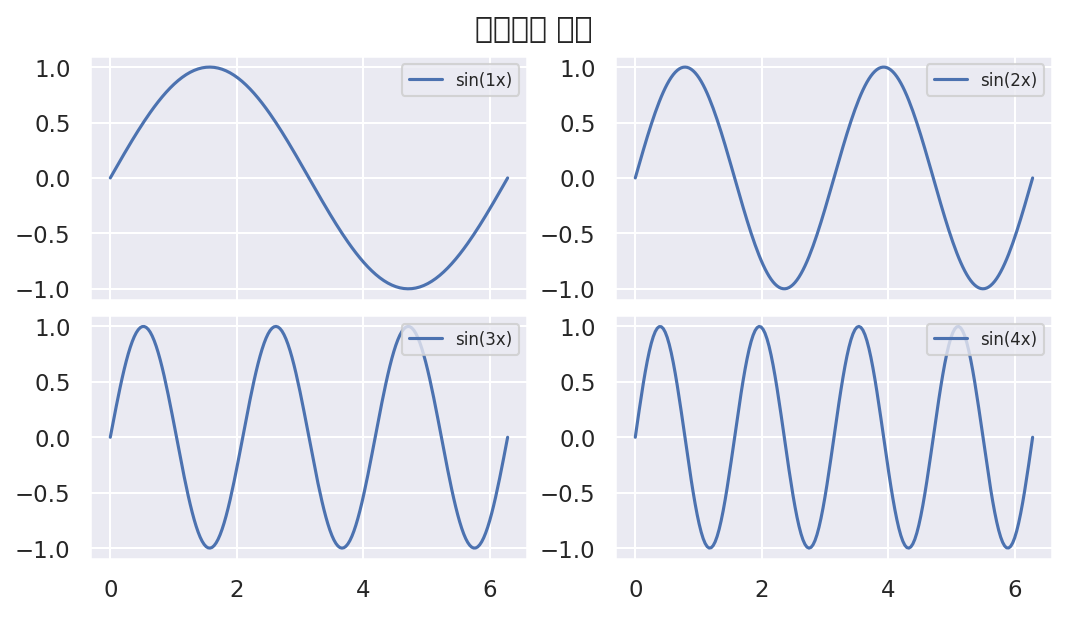

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)

# Matplotlib: 2x2 서브플롯 생성
# sharex=True: 모든 서브플롯이 x축을 공유
fig, axs = plt.subplots(2, 2, figsize=(7, 4), dpi=150, sharex=True, layout='constrained')

# axs.ravel()로 2x2 배열을 1차원으로 만들어 순회
for i, ax in enumerate(axs.ravel(), start=1):
    ax.plot(x, np.sin(i*x), label=f'sin({i}x)')
    ax.legend(loc='upper right', fontsize=8)

# 전체 제목 설정
fig.suptitle('서브플롯 비교')
plt.show()

# Plotly: 1x2 서브플롯 생성
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig2 = make_subplots(rows=1, cols=2, shared_xaxes=True)
fig2.add_trace(go.Scatter(x=x, y=np.sin(x), name='sin'), row=1, col=1)
fig2.add_trace(go.Scatter(x=x, y=np.cos(x), name='cos'), row=1, col=2)
fig2.show()



---

## 9. 라벨·주석·범례

### 개념
- **라벨(Label)**: 축의 단위나 의미를 명확히 하고, 숫자 포맷을 통일하여 가독성을 높입니다.
- **주석(Annotation)**: 차트의 특정 지점(point)이나 구간(range)에 화살표, 텍스트, 밴드 등을 추가하여 스토리를 전달하고 독자의 시선을 유도합니다.
- **범례(Legend)**: 각 시각적 요소가 무엇을 나타내는지 설명합니다. 위치, 열 개수, 정렬 등을 조정하여 차트의 전체적인 균형을 맞춥니다.

### 핵심 내용
- **라벨 겹침 방지**: 라벨이 밀집된 구간에서는 `offset_text` 라이브러리를 사용하거나, 라벨을 회전시키거나, 축을 전환(bar → barh)하여 겹침을 줄입니다.
- **주석 좌표계**: 주석을 추가할 때는 `xycoords` (데이터 좌표계), `textcoords` (텍스트 위치 좌표계)를 명확히 지정하고, `bbox` 옵션으로 텍스트 박스를 추가하여 가독성을 확보합니다.
- **수동 범례**: 대부분의 라이브러리는 자동으로 범례를 생성하지만, 필요 시 `handles`와 `labels`를 직접 생성하여 수동으로 범례를 구성할 수 있습니다.

### 코드 예제


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47168 (\N{HANGUL SYLLABLE RYE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPyt

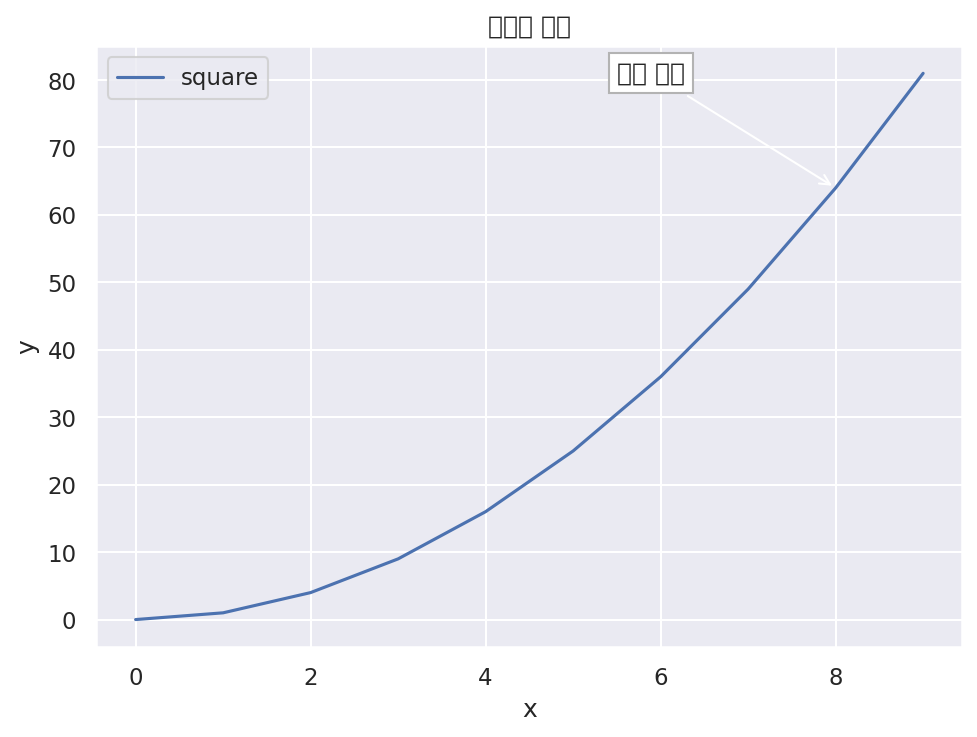

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
y = x**2

fig, ax = plt.subplots(dpi=150, layout='constrained')
ax.plot(x, y, label='square')

# 주석 추가
# xy: 화살표가 가리키는 데이터 좌표
# xytext: 텍스트가 위치할 좌표
# arrowprops: 화살표 스타일
# bbox: 텍스트 상자 스타일
ax.annotate('급증 구간', xy=(8, 64), xytext=(5.5, 80),
            arrowprops=dict(arrowstyle='->', lw=1),
            bbox=dict(fc='white', ec='0.7'))

# 범례와 축/제목 설정
ax.legend(loc='upper left', ncols=1)
ax.set(xlabel='x', ylabel='y', title='주석과 범례')
plt.show()

# Plotly: 구간 강조 및 주석
import plotly.express as px
fig2 = px.line(x=x, y=y)
# add_vrect: 수직 구간 강조
fig2.add_vrect(x0=7, x1=9, fillcolor='lightblue', opacity=0.3)
# add_annotation: 주석 추가
fig2.add_annotation(x=8, y=64, text='급증', showarrow=True)
fig2.show()



---

## 10. 스타일·폰트·테마

### 개념
- **글로벌 스타일**: `rcParams` (Matplotlib)나 템플릿(Plotly, Altair)을 사용하여 프로젝트 전체의 시각적 미학(폰트, 색상, 그리드 등)을 통일합니다.
- **로케일(Locale) 이슈**: 한글 폰트가 깨지거나, 유니코드 마이너스 부호(`-`)가 깨지는 등의 로케일 관련 이슈는 초기에 폰트 설정을 통해 고정해야 합니다.
- **출력 매체 최적화**: 최종 결과물이 논문, 웹, 대시보드 중 어디에 사용될지에 따라 DPI, 폰트 크기, 여백 등을 적절히 조정해야 합니다.

### 핵심 내용
- **Matplotlib**: `plt.rcParams.update({...})`로 폰트, 그리드, 사이즈 등 전역 설정을 변경하고, `plt.style.use('seaborn-v0_8-whitegrid')` 등으로 미리 정의된 테마를 적용합니다.
- **Seaborn**: `sns.set_theme(context='talk', style='whitegrid', palette='colorblind')`로 컨텍스트, 스타일, 팔레트를 한 번에 설정합니다.
- **Plotly**: `px.defaults.template = 'plotly_white'`와 같이 기본 템플릿을 지정합니다.
- **Altair**: `alt.themes.enable('opaque')` 등으로 테마를 활성화하거나, `configure_*` 블록을 사용하여 축, 범례, 폰트 등을 일괄적으로 설정합니다.

### 코드 예제


In [21]:
# Matplotlib 전역 설정 예시
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 11,
    'axes.grid': True,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'figure.dpi': 150,
    # 'font.family': 'Malgun Gothic' # 한글 폰트 설정 예시
})

# Seaborn 테마 설정 예시
import seaborn as sns
sns.set_theme(context='talk', style='whitegrid', palette='colorblind')

# Plotly 템플릿 설정 예시
import plotly.express as px
px.defaults.template = 'plotly_white'

# Altair 테마 활성화 예시
import altair as alt
# alt.themes.enable('opaque')



---

## 11. 분포 ① - 히스토그램

### 개념
- **목적**: 연속형 변수의 분포 형태, 데이터의 범위, 중심 경향성, 왜도(skewness)/첨도(kurtosis) 등을 파악합니다.
- **빈(Bin) 개수 규칙**: 히스토그램의 모양은 구간(bin)의 개수나 너비에 크게 좌우됩니다. `Freedman-Diaconis`, `sqrt`, `Sturges` 등 데이터의 특성에 맞는 규칙을 선택하여 빈의 개수를 결정합니다.
- **정규화/누적**: `density=True`로 설정하면 막대의 면적 합이 1이 되도록 정규화하여 확률 밀도 함수(PDF)처럼 해석할 수 있고, `cumulative=True`로 설정하면 누적 분포 함수(CDF)를 그립니다.

### 핵심 내용
- **다중 집단 비교**: 여러 그룹의 분포를 비교할 때는 동일한 빈 경계와 범위를 사용해야 공정한 비교가 가능합니다.
- **왜도(Skewness) 처리**: 분포가 한쪽으로 심하게 치우쳐져(왜도가 클 때) 있을 경우, 로그 변환이나 Box-Cox 변환 같은 전처리를 하거나 축 스케일을 로그로 변경하는 것을 고려합니다.
- **가독성**: 막대 간 간격을 두거나, `alpha` 값을 조절하여 투명도를 주면 겹치는 부분을 완화할 수 있습니다. 그룹이 많을 경우 파셋(facet)으로 분리하여 표시하는 것이 좋습니다.

### 코드 예제


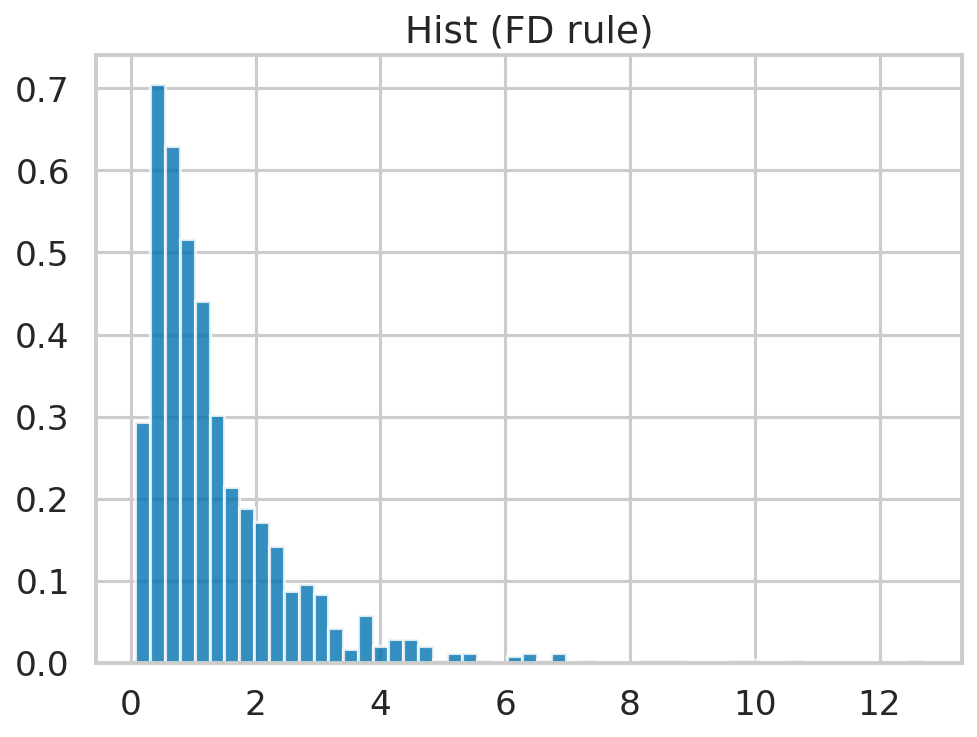

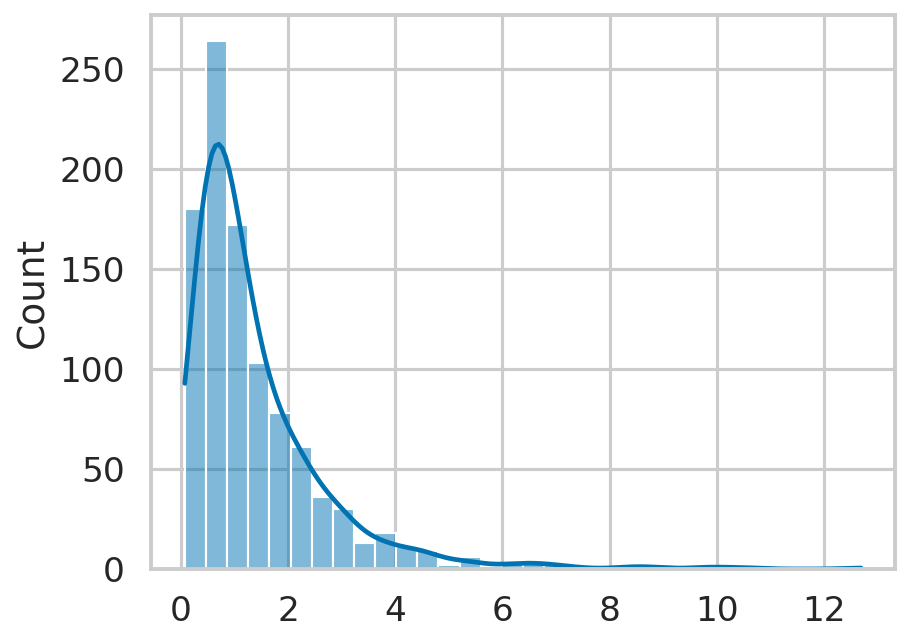

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 로그 정규분포를 따르는 데이터 생성
x = np.random.lognormal(mean=0.0, sigma=0.8, size=1000)

# Matplotlib
fig, ax = plt.subplots(dpi=150, layout='constrained')
# bins='fd': Freedman-Diaconis 규칙에 따라 빈 너비 자동 결정
ax.hist(x, bins='fd', density=True, alpha=0.8)
ax.set(title='Hist (FD rule)')
plt.show()

# Seaborn
# bins='sqrt': 데이터 개수의 제곱근만큼 빈 생성
# kde=True: 커널 밀도 추정 곡선을 함께 표시
sns.histplot(x=x, bins='sqrt', kde=True)
plt.show()

# Plotly
# nbins=40: 빈 개수를 40개로 지정
# marginal='rug': 주변부에 데이터 위치를 나타내는 러그 플롯 추가
fig2 = px.histogram(x=x, nbins=40, marginal='rug')
fig2.show()



---

## 12. 분포 ② - KDE & ECDF

### 개념
- **KDE (Kernel Density Estimation)**: 커널(kernel) 함수를 사용하여 히스토그램보다 매끄럽게 추정된 확률 밀도 곡선을 그립니다. 커널의 폭(`bw_method`/`bandwidth`)이 곡선의 매끄러운 정도를 결정합니다.
- **ECDF (Empirical Cumulative Distribution Function)**: 경험적 누적 분포 함수로, 데이터가 특정 값보다 작거나 같을 확률을 직접 표시합니다. 히스토그램의 빈(bin) 설정에 따른 의존성을 피할 수 있는 장점이 있습니다.
- **상호 보완**: 두 기법 모두 분포의 형태를 비교하거나 시간에 따른 변화 추이를 보는 데 유용하며, 서로 상호 보완적인 정보를 제공합니다.

### 핵심 내용
- **KDE 밴드폭**: 샘플 수가 적을수록 밴드폭을 넓게, 많을수록 좁게 설정하는 경향이 있습니다.
- **공정한 비교**: 여러 그룹의 분포를 비교할 때는 동일한 밴드폭과 공유된 축을 사용하여 공정하게 비교해야 합니다.
- **ECDF의 안정성**: ECDF는 이상치(outlier)의 영향을 적게 받으므로, 분포의 중앙값이나 꼬리 부분을 비교할 때 특히 안정적입니다.

### 코드 예제


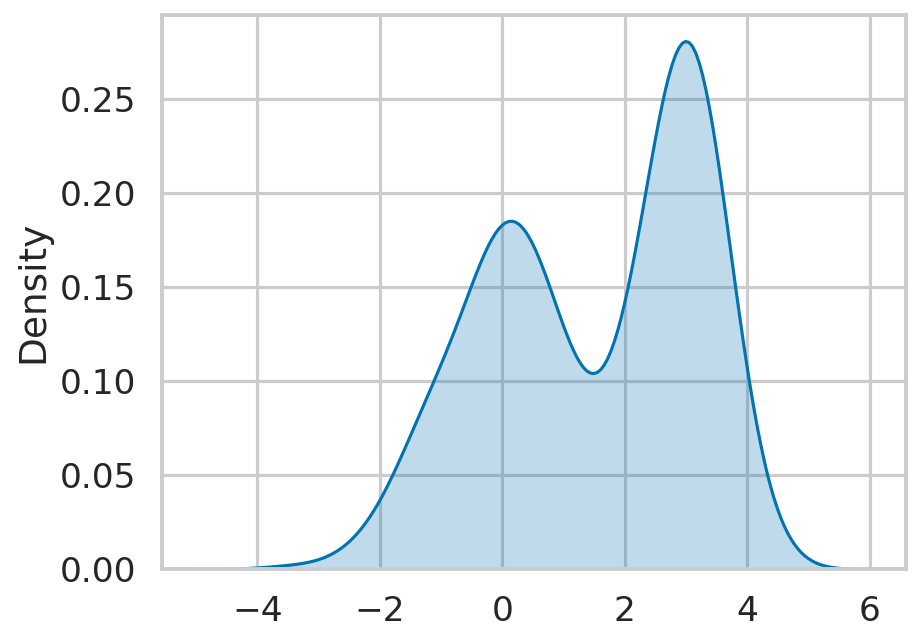

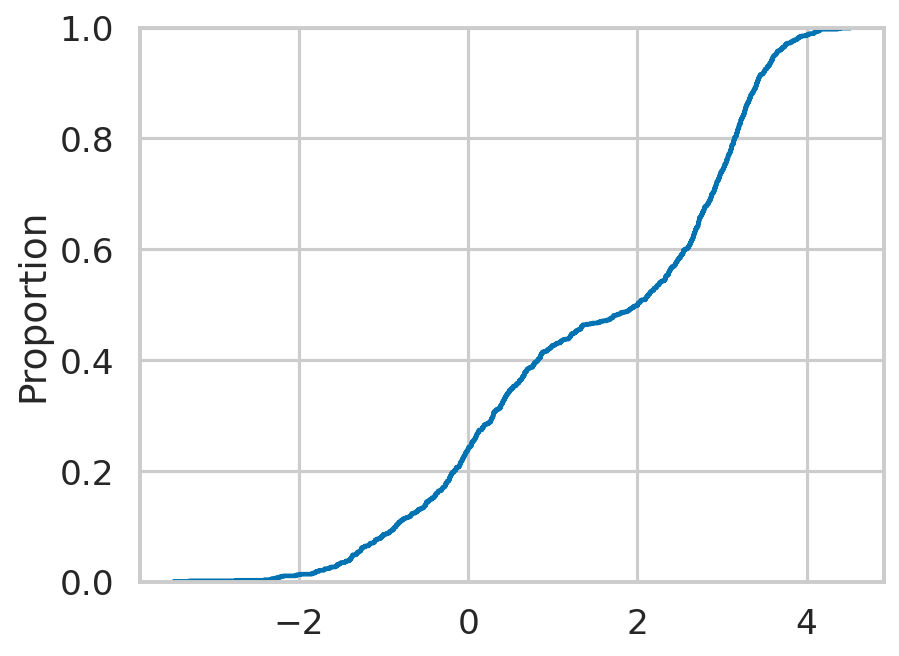

In [24]:
import seaborn as sns
import numpy as np

# 두 개의 다른 정규분포를 따르는 데이터를 합쳐서 생성
x = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(3, 0.5, 500)])

# KDE (커널 밀도 추정)
# bw_method=0.3: 밴드폭을 0.3으로 설정
# fill=True: 곡선 아래 영역을 채움
sns.kdeplot(x=x, bw_method=0.3, fill=True)
plt.show()

# ECDF (경험적 누적 분포)
# stat='proportion': y축을 0과 1 사이의 비율로 표시
sns.ecdfplot(x=x, stat='proportion')
plt.show()

# Altair KDE 예시
# alt.Chart(df).transform_density('x', as_=['x', 'density'], bandwidth=0.5).mark_area()



---

## 13. 분포 ③ - 박스·바이올린·스트립/스웜

### 개념
- **박스 플롯(Box Plot)**: 데이터를 사분위수(quartiles), 중앙값(median), 그리고 수염(whisker)으로 표현된 이상치로 요약하여 보여줍니다.
- **바이올린 플롯(Violin Plot)**: KDE를 기반으로 데이터의 전체적인 분포 형태와 대칭성을 박스 플롯보다 더 상세하게 보여줍니다.
- **스트립/스웜 플롯(Strip/Swarm Plot)**: 실제 개별 샘플의 분포를 점으로 직접 표시합니다. 스웜 플롯은 점들이 겹치지 않도록 옆으로 퍼뜨려 표본의 크기까지 드러냅니다.

### 핵심 내용
- **정보 손실 방지**: 샘플 수가 적을 때는, 요약 정보만 보여주는 박스 플롯에 스트립/스웜 플롯을 함께 그려 정보 손실을 줄이는 것이 좋습니다.
- **바이올린 플롯 조정**: 바이올린 플롯의 KDE `width`나 `cut` 파라미터를 조정하여 분포의 꼬리 부분에서 발생할 수 있는 왜곡을 완화할 수 있습니다.
- **순서 유지**: 순서가 있는 범주형 데이터를 다룰 때는 `order`나 `hue_order` 파라미터를 사용하여 여러 차트에서 일관된 정렬을 유지해야 합니다.

### 코드 예제


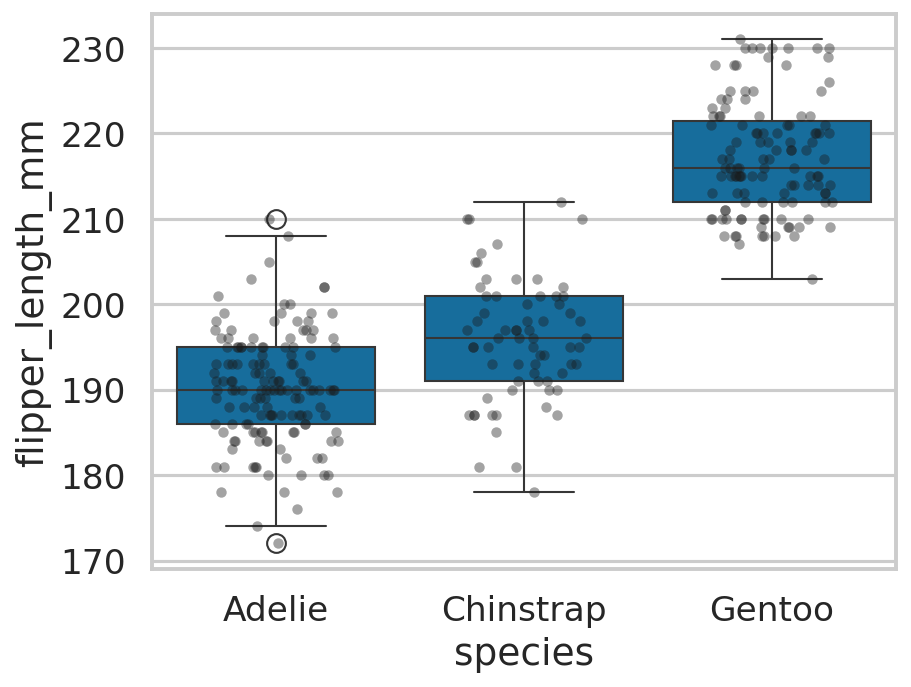

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'penguins' 데이터셋 로드
peng = sns.load_dataset('penguins').dropna()

# 박스 플롯과 스트립 플롯을 함께 그리기
# 1. 박스 플롯으로 사분위수 요약
ax = sns.boxplot(data=peng, x='species', y='flipper_length_mm', whis=1.5)
# 2. 스트립 플롯으로 실제 데이터 분포를 점으로 추가
# color='k': 검은색, alpha: 투명도, jitter: 점을 좌우로 약간 흔들어 겹침 방지
sns.stripplot(data=peng, x='species', y='flipper_length_mm', color='k', alpha=.4, jitter=.25)
plt.show()

# Plotly 바이올린 플롯 예시
# import plotly.express as px
# fig = px.violin(peng, x='species', y='flipper_length_mm', points='all') # points='all'로 모든 점 표시



---

## 14. 분포 ④ - 2D 밀도·Hexbin·2D 히스토그램

### 개념
- **대규모 산점도 문제**: 데이터 포인트가 매우 많을 경우, 점들이 서로 겹쳐서 실제 밀도를 파악하기 어려운 오버플로팅(overplotting) 문제가 발생합니다.
- **밀도 표현**: 이 문제를 해결하기 위해, 2차원 공간을 격자로 나누어 각 영역의 밀도를 표현합니다.
    - **2D 히스토그램/Hexbin**: 사각형 또는 육각형(hexagonal) 격자로 공간을 나누고, 각 셀에 포함된 점의 개수를 색으로 표현합니다.
    - **2D KDE**: 등고선(contour) 형태로 2차원 밀도를 부드럽게 추정하여 표현합니다.
- **해상도 튜닝**: `gridsize`나 `nbins` 파라미터를 조정하여 격자의 크기(해상도)를 조절해야 합니다. 너무 크면 과소집계, 너무 작으면 과대집계 문제가 발생할 수 있습니다.
- **연속 색상 맵**: 값의 분포에 맞춰 로그/파워 스케일 등으로 정규화된 연속적인 컬러맵을 사용하는 것이 효과적입니다.

### 핵심 내용
- **전환 시점**: 산점도에서 오버플로팅이 발생하면, `alpha` 값을 낮추거나, 데이터를 샘플링하거나, 2D 밀도/집계 플롯으로 전환하는 것을 고려해야 합니다.
- **좌표/범위 고정**: 여러 차트를 비교할 때는 좌표와 색상 범위를 고정하여 일관된 기준을 유지해야 합니다.

### 코드 예제


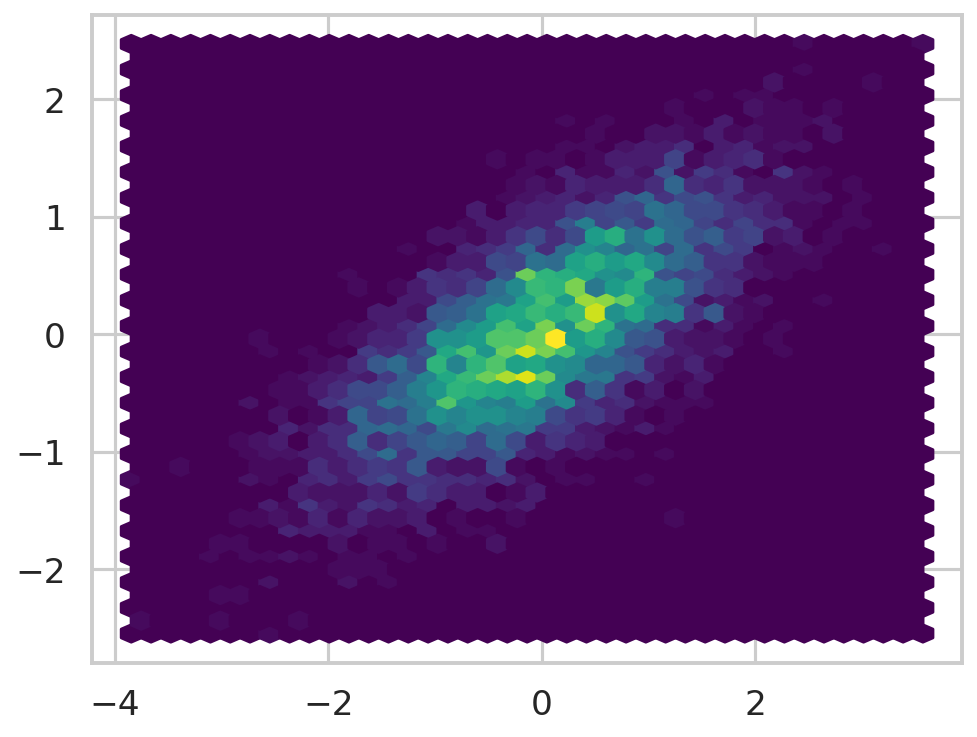

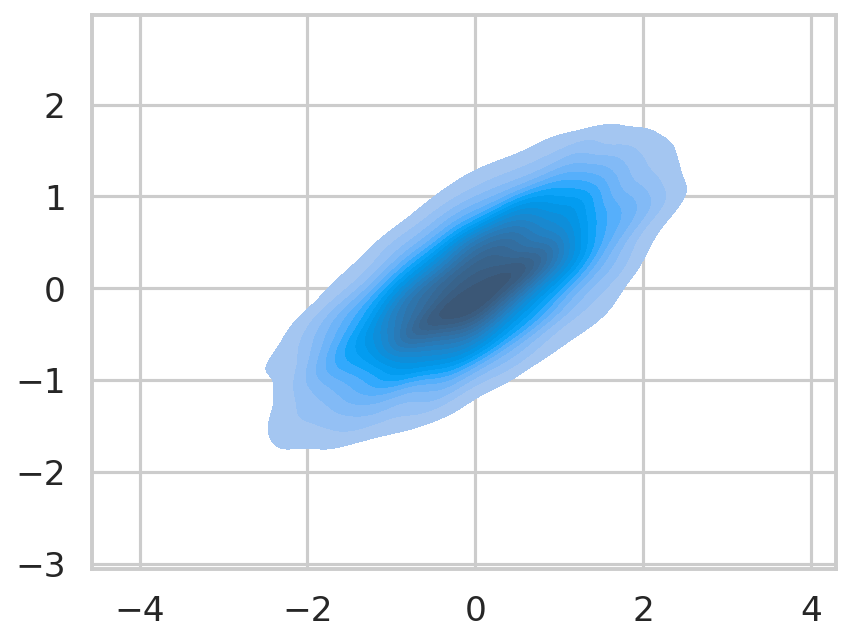

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2D 정규분포 데이터 생성
x = np.random.randn(5000)
y = x * 0.5 + np.random.randn(5000) / 2

# Matplotlib Hexbin
fig, ax = plt.subplots(dpi=150, layout='constrained')
# gridsize=40: 40x40 육각형 그리드
ax.hexbin(x, y, gridsize=40, cmap='viridis')
plt.show()

# Seaborn 2D KDE
# fill=True: 등고선 내부를 채움, levels: 등고선 개수
sns.kdeplot(x=x, y=y, fill=True, levels=20)
plt.show()

# Plotly 2D 히스토그램
df = pd.DataFrame({'x': x, 'y': y})
fig2 = px.density_heatmap(df, x='x', y='y', nbinsx=40, nbinsy=40, color_continuous_scale='Viridis')
# fig2.show()



---

## 15. 상관 히트맵 - 숫자형 변수 관계

### 개념
- **상관계수 시각화**: 피어슨(Pearson) 또는 스피어만(Spearman) 상관계수 행렬을 히트맵(heatmap)으로 시각화하여, 여러 숫자형 변수 간의 선형 또는 순위 기반 관계를 한눈에 파악합니다.
- **패턴 강조**:
    - **삼각 행렬/마스킹**: 상관 행렬은 대각선을 기준으로 대칭이므로, `mask`를 사용하여 위쪽 또는 아래쪽 삼각 행렬을 가리면 정보 중복을 줄일 수 있습니다.
    - **클러스터링 정렬**: 상관관계가 높은 변수들끼리 가깝게 위치하도록 클러스터링 기반으로 행/열을 정렬하면 패턴을 더 쉽게 발견할 수 있습니다.
- **상관관계 ≠ 인과관계**: 상관관계가 높다는 것이 인과관계를 의미하지는 않습니다. 다중공선성(multicollinearity)이나 다른 공통 요인(confounding variable)의 영향을 항상 주의해야 합니다.

### 핵심 내용
- **스케일/분포 고려**: 변수들의 스케일 차이가 크거나 분포가 비선형적일 경우, 피어슨 상관계수보다 스피어만 순위 상관계수를 사용하거나 데이터 변환을 먼저 고려하는 것이 좋습니다.
- **값 라벨**: `annot=True` 옵션으로 각 셀에 상관계수 값을 표시할 수 있지만, 변수가 많을 때는 차트가 복잡해지므로 툴팁이나 인터랙티브 기능을 활용하는 것이 더 낫습니다.
- **결측치 처리 정책**: 상관계수 계산 시 결측치를 어떻게 처리할지(`pairwise` vs `complete` 삭제) 정책을 명확히 하고 문서화해야 합니다.

### 코드 예제


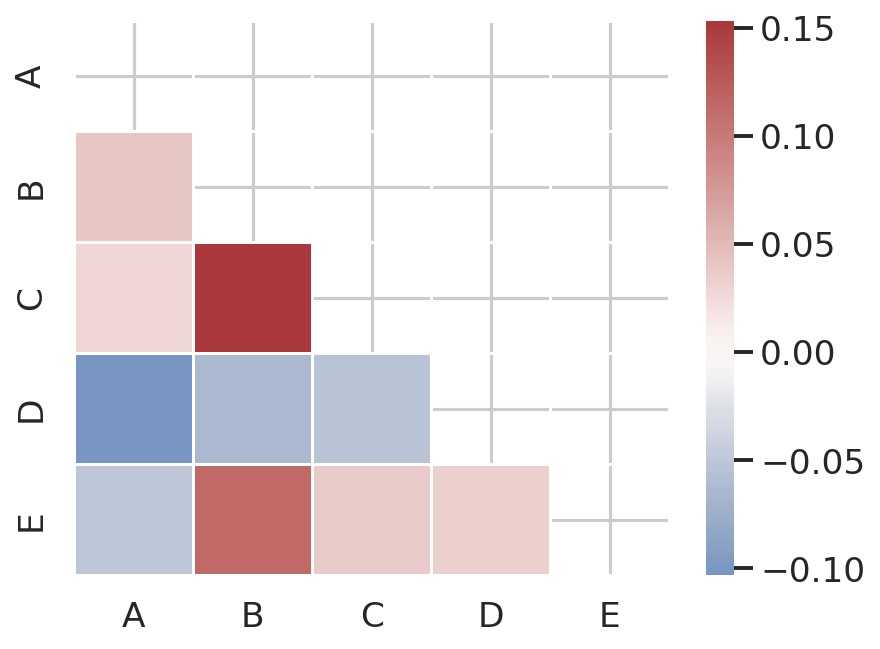

In [27]:
import seaborn as sns
import numpy as np
import pandas as pd

# 랜덤 데이터 생성
rng = np.random.default_rng(0)
df = pd.DataFrame(rng.normal(size=(200, 5)), columns=list('ABCDE'))

# 피어슨 상관계수 계산
cm = df.corr(method='pearson')

# 상단 삼각 행렬을 가리기 위한 마스크 생성
mask = np.triu(np.ones_like(cm, dtype=bool))

# 히트맵 그리기
# mask=mask: 마스크가 True인 부분을 그리지 않음
# cmap='vlag': 발산형 컬러맵 (0을 중심으로 색이 나뉨)
# center=0: 컬러맵의 중심을 0으로 설정
# linewidths=.5: 셀 사이의 간격
sns.heatmap(cm, mask=mask, cmap='vlag', center=0, annot=False, linewidths=.5)
plt.show()

# Plotly 히트맵 예시
# import plotly.express as px
# fig = px.imshow(cm, color_continuous_scale='RdBu', origin='lower', zmin=-1, zmax=1)



---

## 16. 에러바·불확실성 표현

### 개념
- **불확실성 시각화**: 표본 오차(Standard Error), 표준 편차(Standard Deviation), 신뢰 구간(Confidence Interval) 등 통계적 추정의 불확실성을 에러바(error bar)나 밴드(band, 리본) 형태로 시각화합니다.
- **해석의 안정성**: 집계된 값을 보여주는 라인 차트나 바 차트는 신뢰구간을 함께 제시하여, 표시된 값이 통계적으로 얼마나 안정적인지 정보를 제공해야 합니다.
- **비대칭 분포**: 데이터의 분포나 표본 수가 비대칭적일 경우, 정규분포를 가정한 CI보다 부트스트랩(bootstrap) 기반의 비모수적(non-parametric) CI를 고려하는 것이 더 정확할 수 있습니다.

### 핵심 내용
- **Matplotlib**: `ax.errorbar()`로 에러바를, `ax.fill_between()`으로 신뢰구간 밴드(리본)를 표현합니다.
- **Seaborn**: `lineplot`, `barplot` 등에서 `errorbar` 파라미터에 `'ci'`(신뢰구간), `'sd'`(표준편차), `'se'`(표준오차) 또는 사용자 정의 함수를 전달하여 쉽게 불확실성을 표현할 수 있습니다.
- **Plotly**: `error_y` 파라미터에 딕셔너리 형태로 에러바의 타입(`'data'`, `'percent'`)과 값(`array`)을 지정하여 대화형 에러바를 구현합니다.

### 코드 예제


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.



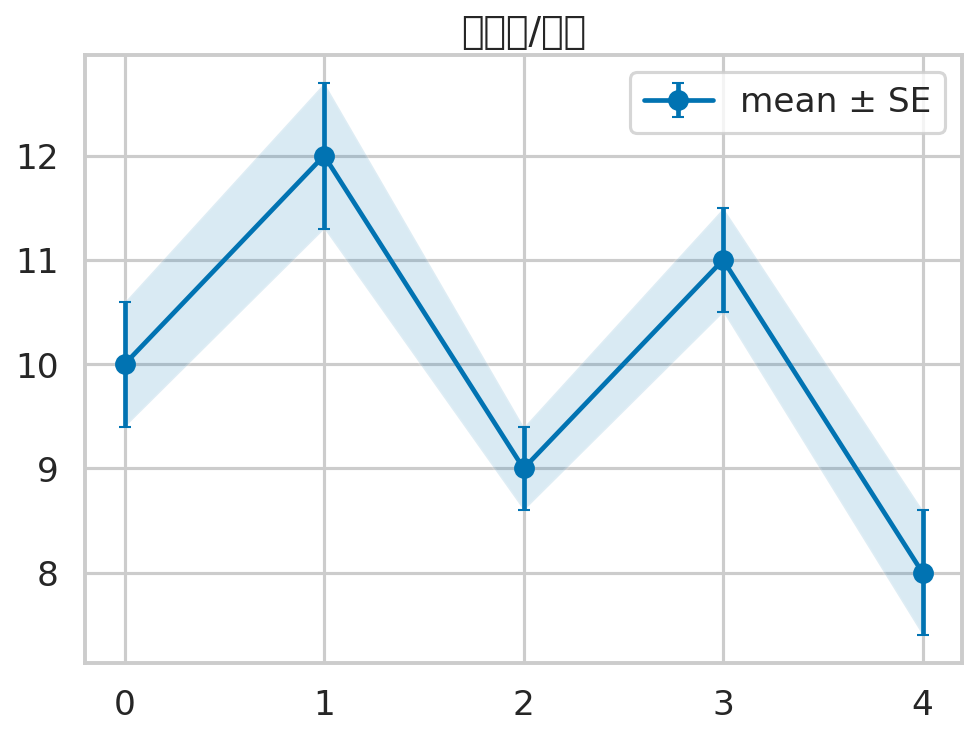

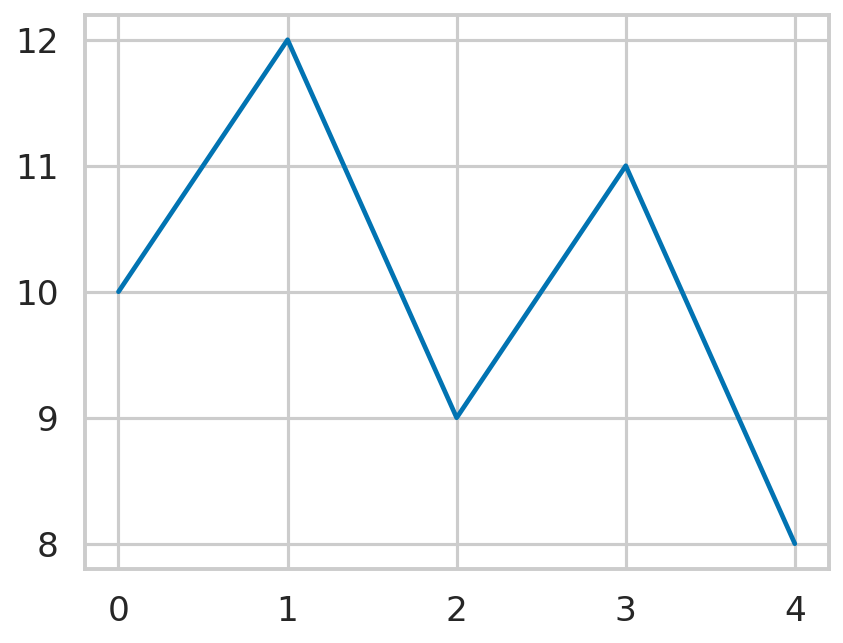

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

x = np.arange(5)
y = np.array([10, 12, 9, 11, 8])
se = np.array([0.6, 0.7, 0.4, 0.5, 0.6]) # 표준 오차(Standard Error)

# Matplotlib: 에러바와 리본(밴드)
fig, ax = plt.subplots(dpi=150, layout='constrained')
# yerr=se: y축 방향으로 se만큼 에러바 표시
# fmt='o-': 동그란 마커와 실선으로 연결
# capsize=3: 에러바 끝의 T자 모양 캡 크기
ax.errorbar(x, y, yerr=se, fmt='o-', capsize=3, label='mean ± SE')
# fill_between: y-se와 y+se 사이를 반투명한 밴드로 채움
ax.fill_between(x, y - se, y + se, alpha=.15)
ax.legend()
ax.set(title='에러바/리본')
plt.show()

# Seaborn: 라인 플롯에 에러바 자동 표시
# errorbar=('se', 1): 표준오차(se)의 1배수만큼 에러바 표시
sns.lineplot(x=x, y=y, errorbar=('se', 1))
plt.show()

# Plotly: 라인 플롯에 에러바 표시
fig2 = px.line(x=x, y=y, error_y=se, title='Plotly Error Bars')
# fig2.show()



---

## 17. 범주형 고급 - 순서·정렬·라벨

### 개념
- **의미 있는 비교**: 범주형 데이터를 비교할 때는 값의 크기 순으로 정렬하거나, 의미 있는 순서(예: 'S' < 'M' < 'L')를 사전에 정의해야 비교가 용이해집니다.
- **가독성**: 값 라벨을 막대 끝에 표시하고, 단위를 명확히 포맷하면 해석 속도를 높일 수 있습니다. 카테고리 이름이 길어 겹칠 때는 수평 막대 차트(`barh`)가 효과적입니다.
- **일관성**: 여러 차트에 걸쳐 동일한 범례 순서와 색상 팔레트를 일관되게 사용하면, 독자가 여러 차트를 넘나들며 비교하기 쉬워집니다.

### 핵심 내용
- **Seaborn**: `order`, `hue_order` 파라미터로 정렬 순서를 직접 제어하고, `estimator`, `errorbar` 파라미터로 요약 통계량과 오차를 함께 표시할 수 있습니다.
- **Matplotlib**: `ax.bar_label()`로 막대에 값 라벨을 쉽게 추가할 수 있으며, `fmt` 파라미터로 숫자 포맷을 지정할 수 있습니다. `ax.barh()`로 수평 막대 차트를 그립니다.
- **Plotly**: `category_orders` 파라미터로 범주 순서를 명시적으로 지정할 수 있습니다.

### 코드 예제


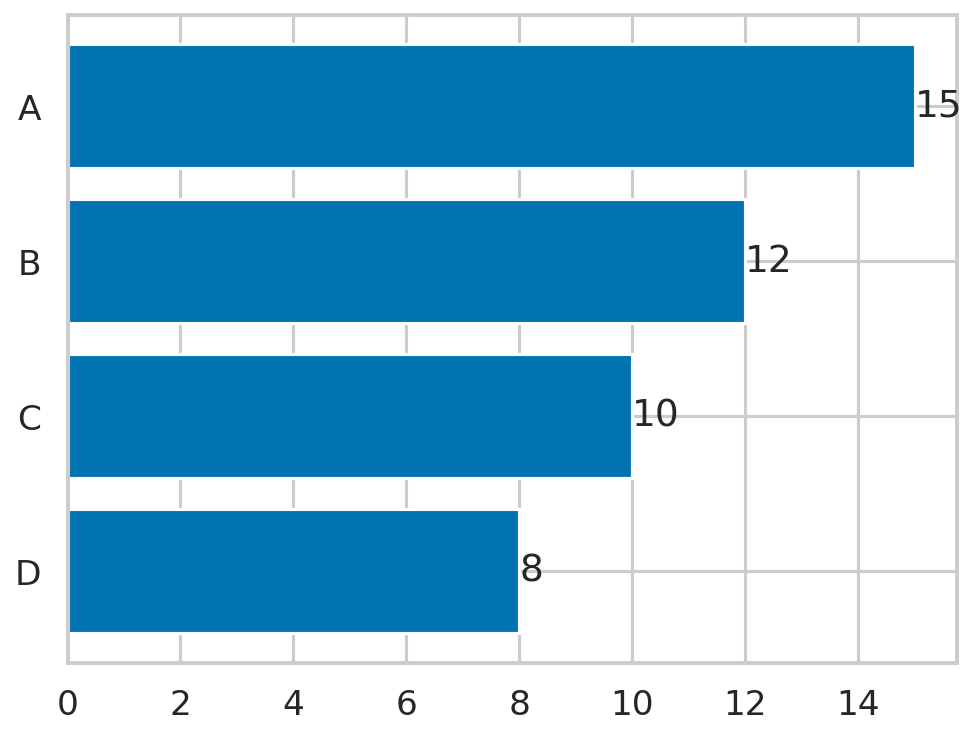

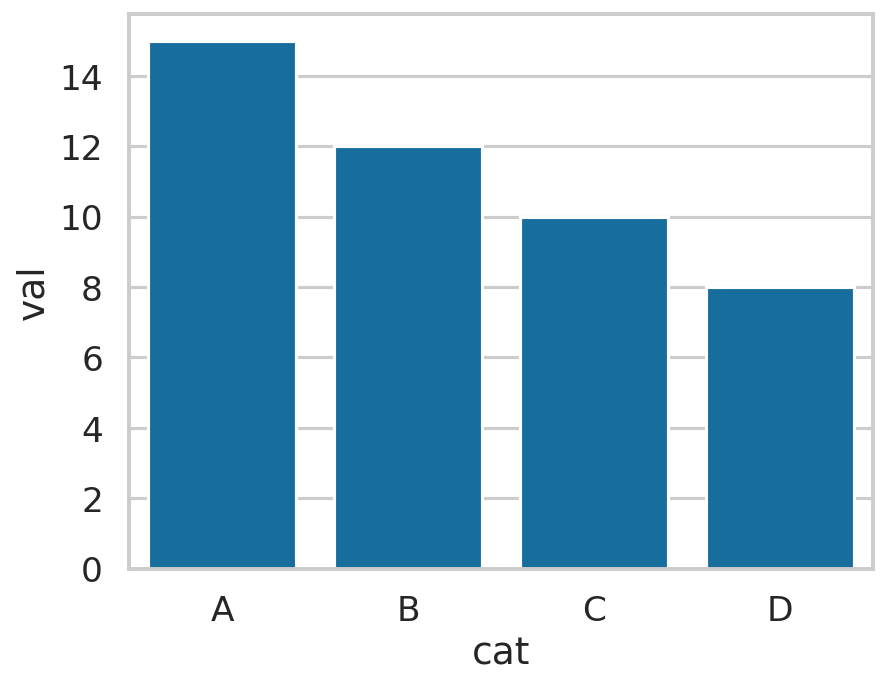

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 값의 크기 순으로 정렬된 Series
s = pd.Series({'B': 12, 'D': 8, 'A': 15, 'C': 10}).sort_values(ascending=False)

# Matplotlib: 수평 막대 차트와 라벨
fig, ax = plt.subplots(dpi=150, layout='constrained')
ax.barh(s.index, s.values)
# ax.containers[0]: 첫 번째 컨테이너(막대 그룹)에 라벨 추가
# fmt='%.0f': 소수점 없는 정수로 포맷
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
ax.invert_yaxis() # y축 순서를 뒤집어 위에서부터 큰 값이 오도록 함
plt.show()

# Seaborn: 정렬 순서 지정
df = s.reset_index().rename(columns={'index': 'cat', 0: 'val'})
# order=df['cat']: df['cat'] 컬럼의 순서대로 막대를 정렬
sns.barplot(data=df, x='cat', y='val', order=df['cat'])
plt.show()

# Plotly: 정렬 순서 및 텍스트 지정
fig2 = px.bar(df, x='cat', y='val', text='val',
              category_orders={'cat': df['cat'].tolist()})
# fig2.show()



---

## 18. 그룹·누적·100% 스택 막대

### 개념
- **그룹 막대(Grouped Bar)**: 여러 그룹의 절대적인 값을 나란히 비교할 때 사용합니다.
- **누적 막대(Stacked Bar)**: 전체 합계 내에서 각 구성 요소가 차지하는 기여도를 보여줄 때 사용합니다.
- **100% 누적 막대(100% Stacked Bar)**: 전체에서 각 구성 요소가 차지하는 **비율**을 중심으로 비교할 때 사용합니다. 이 경우, 전체 합계라는 절대적인 규모 정보는 사라집니다.
- **복잡도 관리**: 비교할 항목이 너무 많아지면 차트가 복잡해지므로, 중요한 항목만 하이라이트하거나 파셋(facet)으로 차트를 분할하는 것이 좋습니다.

### 핵심 내용
- **Plotly**: `barmode` 파라미터를 `'group'`, `'stack'`, `'relative'`(100% 누적)로 변경하여 모드를 쉽게 전환할 수 있습니다.
- **Seaborn**: `catplot(kind='bar', hue=...)` 조합으로 그룹 막대 차트를 쉽게 그릴 수 있습니다. 누적 막대는 `catplot`에서 직접 지원하지 않으므로, DataFrame을 사전에 집계하고 `sns.histplot`의 `multiple="stack"` 옵션을 사용하거나 Matplotlib을 활용해야 합니다.
- **Altair**: `stack` 인코딩 속성을 `None`(그룹), `'zero'`(누적), `'normalize'`(100% 누적)로 설정하여 누적 방식을 제어합니다.

### 코드 예제


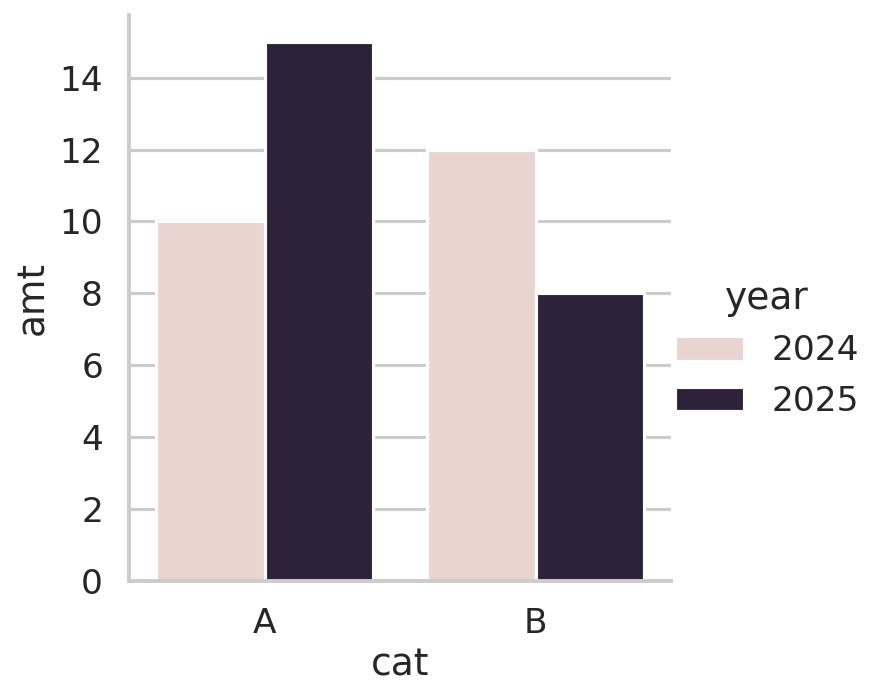

In [30]:
import pandas as pd
import plotly.express as px
import seaborn as sns

sales = pd.DataFrame({
    'cat': ['A', 'A', 'B', 'B'],
    'year': [2024, 2025, 2024, 2025],
    'amt': [10, 15, 12, 8]
})

# Plotly: 그룹/스택/100% 스택 모드
# barmode='group': 그룹 막대
fig_g = px.bar(sales, x='cat', y='amt', color='year', barmode='group', title='Grouped Bar')
# fig_g.show()

# barmode='stack': 누적 막대
fig_s = px.bar(sales, x='cat', y='amt', color='year', barmode='stack', title='Stacked Bar')
# fig_s.show()

# barmode='relative': 100% 누적 막대
fig_p = px.bar(sales, x='cat', y='amt', color='year', barmode='relative', title='100% Stacked Bar')
# fig_p.show()

# Seaborn: 그룹 막대
# kind='bar', hue='year'를 통해 그룹 막대 차트 생성
sns.catplot(data=sales, x='cat', y='amt', hue='year', kind='bar')
plt.show()



---

## 19. 랭킹 하이라이트 - 상위 N 강조

### 개념
- **시선 집중**: 상위/하위 N개 항목만 다른 색으로 강조하여 시선을 집중시키고, 나머지는 옅은 색이나 회색으로 처리하여 컨텍스트를 유지합니다.
- **기준점 제공**: 강조할 대상에만 라벨을 붙이고, 전체 평균이나 합계 기준선을 추가하여 기준점을 제공하면 비교가 더 용이해집니다.
- **긴 꼬리 처리**: 순위가 낮은 다수의 항목들(긴 꼬리, long tail)은 별도의 '기타' 그룹으로 묶거나, 파셋, 축 절단, 스파크라인 등으로 보조 표기합니다.

### 핵심 내용
- **Matplotlib**: 색상 배열을 직접 만들거나 `alpha` 값을 조절하여 특정 막대를 하이라이트하고, `ax.bar_label`에 조건문을 넣어 선택적으로 라벨을 표시할 수 있습니다.
- **Altair**: `condition`을 사용하여 데이터 값에 따라 시각적 인코딩(예: 색상)을 동적으로 변경하는 조건부 인코딩이 매우 강력합니다.
- **Plotly**: 하이라이트할 데이터와 나머지 데이터를 별도의 트레이스(trace)로 분리하여 그리거나, `update_traces(selector=...)`를 사용하여 특정 조건의 트레이스만 스타일을 변경할 수 있습니다.

### 코드 예제


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.



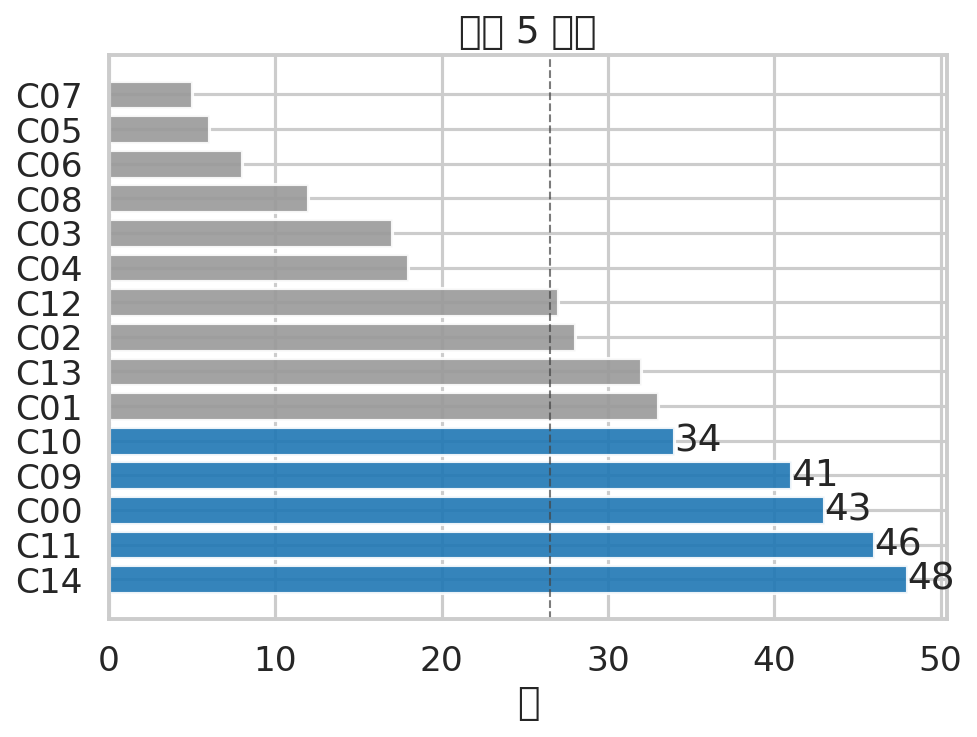

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
s = pd.Series(rng.integers(5, 50, 15), index=[f'C{i:02d}' for i in range(15)]).sort_values()
N = 5

# 상위 N개 항목 추출
highlight = s.nlargest(N)

# 상위 N개는 다른 색으로, 나머지는 회색으로 지정
colors = ['#1f77b4' if idx in highlight.index else '#999999' for idx in s.index]

fig, ax = plt.subplots(dpi=150, layout='constrained')
ax.barh(s.index, s.values, color=colors, alpha=.9)

# 상위 N개 항목에만 라벨 표시
labels = [f'{v:.0f}' if i in highlight.index else '' for i, v in s.items()]
ax.bar_label(ax.containers[0], labels=labels)

# 전체 평균선을 추가하여 기준점 제공
ax.axvline(s.mean(), ls='--', lw=1, color='#444', alpha=.7)

ax.set(title=f'상위 {N} 강조', xlabel='값')
ax.invert_yaxis()
plt.show()



---

## 20. 파셋 / 스몰멀티플

### 개념
- **조건별 비교**: 특정 조건(범주, 구간)별로 전체 데이터를 나누어, 동일한 축과 스케일을 가진 여러 개의 작은 차트(스몰 멀티플)로 복제하여 패턴의 차이를 명확하게 보여줍니다.
- **가독성 향상**: 공유된 축과 범례를 사용하여 불필요한 시각적 요소를 줄이고, 각 차트의 제목에 조건값을 명시하여 비교 가능성을 높입니다.
- **인지 부하 감소**: 하나의 복잡한 차트에 너무 많은 정보를 담는 대신, 공간적으로 분할하여 인지적 부하를 낮추는 효과가 있습니다.

### 핵심 내용
- **Seaborn**: `FacetGrid`를 직접 사용하거나, `catplot`, `relplot` 같은 고수준 API의 `col`, `row`, `hue` 래퍼(wrapper) 파라미터를 사용하여 쉽게 구현할 수 있습니다.
- **Plotly**: `facet_row`, `facet_col` 파라미터를 사용하며, `matches`나 `shared_xaxes` 같은 옵션으로 축 공유를 제어합니다.
- **Altair**: `facet()` 메서드를 사용하며, `resolve_scale()`을 통해 각 파셋의 스케일을 독립적으로 할지('independent') 또는 공유할지('shared') 조정할 수 있습니다.

### 코드 예제


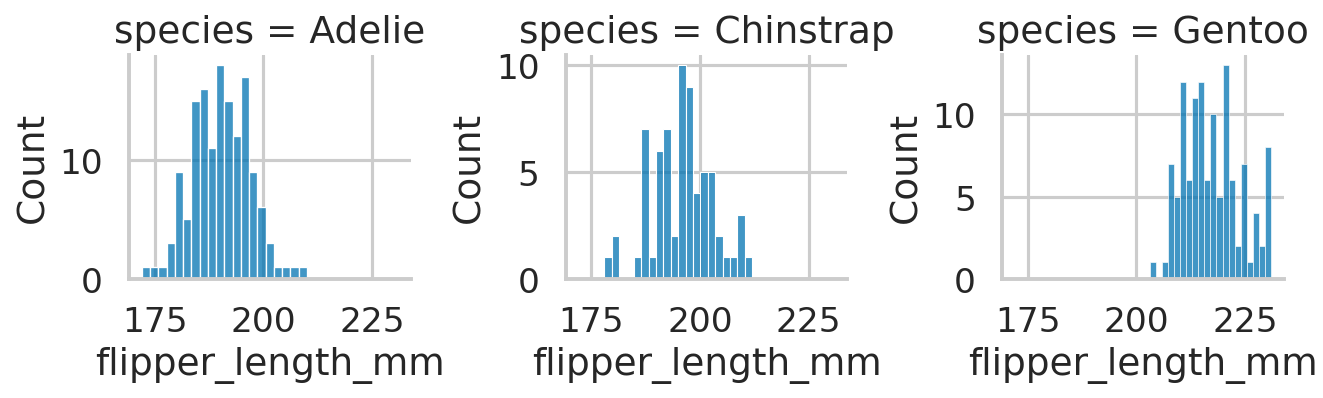

In [32]:
import seaborn as sns
import plotly.express as px

peng = sns.load_dataset('penguins').dropna()

# Seaborn FacetGrid
# col='species': 'species' 컬럼의 고유값별로 열을 나누어 차트를 그림
# col_wrap=3: 한 행에 최대 3개의 차트를 그림
# sharex=True, sharey=False: x축은 공유하고 y축은 독립적으로 설정
fg = sns.FacetGrid(peng, col='species', height=3, col_wrap=3, sharex=True, sharey=False)
# 각 파셋에 히스토그램을 그림
fg.map_dataframe(sns.histplot, x='flipper_length_mm', bins=20)
plt.show()

# Plotly facet
# facet_col='sex': 'sex' 컬럼 값에 따라 열을 분할
fig = px.scatter(peng, x='bill_length_mm', y='bill_depth_mm', color='sex',
                 facet_col='species', title='종별/성별 부리 특성')
# fig.show()



---

## 21. 시계열 ① - 날짜축 포맷

### 개념
- **가독성 있는 시간축**: 시간축은 독자가 쉽게 이해할 수 있도록 로케일(지역 설정), 시간 간격, 날짜 포맷을 함께 고려하여 설계해야 합니다.
- **Matplotlib 세밀 제어**: `matplotlib.dates` 모듈의 로케이터(Locator)와 포매터(Formatter)를 사용하면, 주 눈금과 보조 눈금의 위치, 레이블 형식을 매우 세밀하게 제어할 수 있습니다.
- **Plotly/Altair 자동 포맷**: Plotly와 Altair는 줌 레벨에 따라 날짜/시간 축의 포맷을 자동으로 보기 좋게 조정해주는 기능이 뛰어나며, `tickformat`이나 `axis` 설정을 통해 커스터마이징할 수 있습니다.

### 핵심 내용
- **과밀 방지**: 데이터가 촘촘할 때는 주 눈금(major tick)은 월/분기 단위로, 보조 눈금(minor tick)은 주/일 단위로 계층화하여 과밀을 방지합니다.
- **타임존 명시**: 축 라벨에 타임존(UTC, KST 등)이나 기준(로컬 시간)을 명시하여 혼동을 줄입니다.
- **겹침 제거**: 긴 날짜 레이블이 겹칠 경우, 각도를 주어 회전시키거나 여러 줄로 줄바꿈(`
`)하여 가독성을 확보합니다.

### 코드 예제


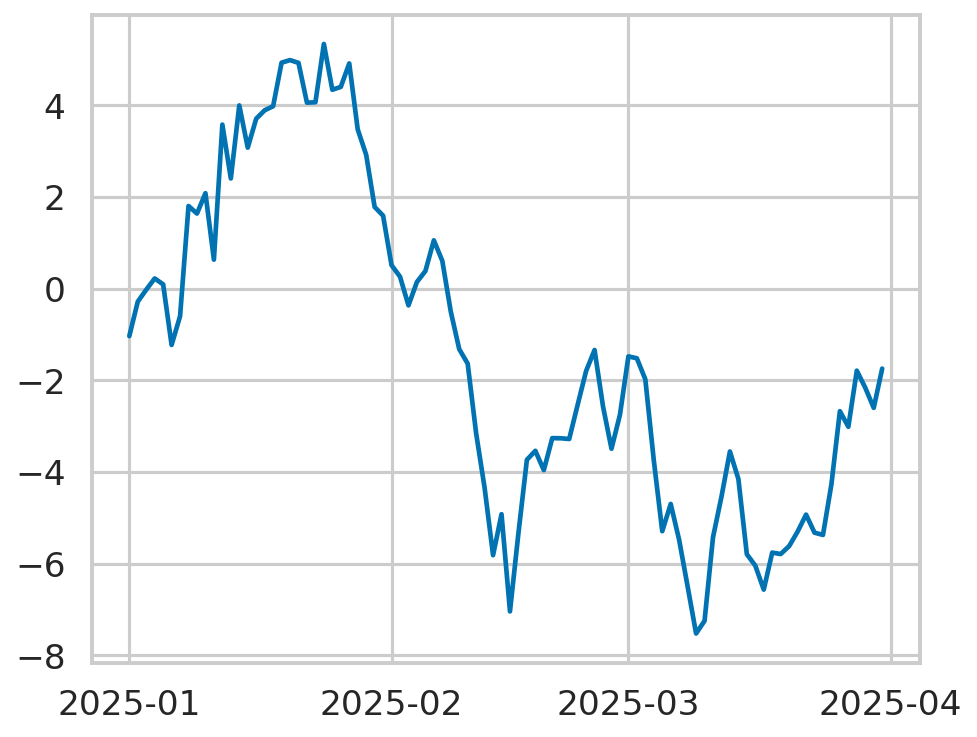

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 90일간의 시계열 데이터 생성
idx = pd.date_range('2025-01-01', periods=90, freq='D')
s = pd.Series(np.random.randn(90).cumsum(), index=idx)

fig, ax = plt.subplots(dpi=150, layout='constrained')
ax.plot(s.index, s.values)

# x축의 주 눈금을 월(Month) 단위로 설정
ax.xaxis.set_major_locator(mdates.MonthLocator())
# 주 눈금의 레이블 포맷을 '년-월' 형태로 지정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x축의 보조 눈금을 주(Weekday) 단위로 설정
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

# x축 레이블의 각도를 0도로 설정 (회전 없음)
plt.setp(ax.get_xticklabels(), rotation=0)
plt.show()



---

## 22. 시계열 ② - 리샘플·롤링

### 개념
- **리샘플(Resample)**: 주기가 다른 데이터를 집계(예: 일 → 주/월/분기)하여 장기적인 패턴을 봅니다.
- **롤링(Rolling)**: 이동 평균/합계 등을 계산하여 데이터의 노이즈를 완화하고 부드러운 추세를 파악합니다.
- **해석 혼란 방지**: 업샘플링 후에는 `ffill`/`bfill`이나 보간(`interpolate`)을 명시하여 새로 생긴 결측치를 어떻게 처리했는지 명확히 해야 합니다. `rolling`에서는 `window`, `min_periods`, `center`가 핵심 파라미터입니다.

### 핵심 내용
- **스토리텔링**: 원시 데이터(raw data)와 이동 평균 같은 추세선을 함께 표시하여, 세부적인 변동성과 장기적인 추세를 동시에 보여주면 스토리가 풍부해집니다.
- **결측/불규칙 간격**: 데이터에 결측이 있거나 시간 간격이 불규칙할 경우, 먼저 `resample`을 통해 규칙적인 시간 격자(grid)로 맞춘 뒤 롤링 연산을 적용하는 것이 안정적입니다.
- **윈도우 크기 명시**: 범례나 주석에 '7일 이동평균', '30일 이동평균'과 같이 윈도우 크기를 명시하여 독자의 이해를 돕습니다.

### 코드 예제


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.



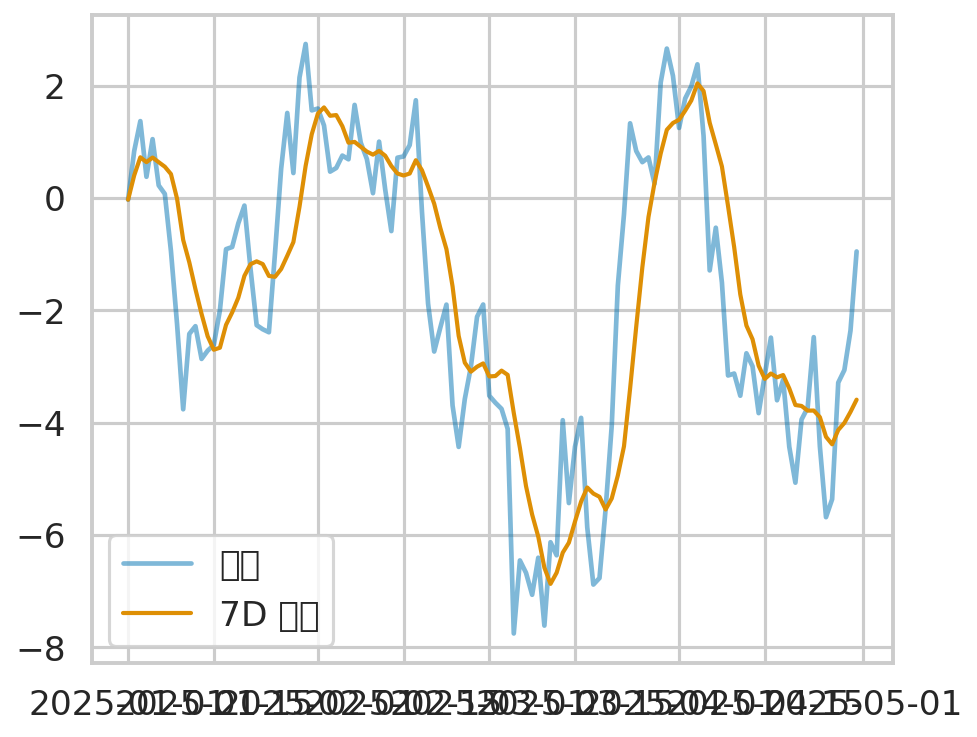

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 120일간의 시계열 데이터 생성
idx = pd.date_range('2025-01-01', periods=120, freq='D')
s = pd.Series(np.random.randn(120).cumsum(), index=idx)

# 7일 이동 평균 계산
ma7 = s.rolling(7, min_periods=1).mean()

fig, ax = plt.subplots(dpi=150, layout='constrained')

# 원본 일일 데이터는 반투명하게 표시
ax.plot(s.index, s, alpha=.5, label='일일')
# 7일 이동 평균은 더 굵은 선으로 강조
ax.plot(ma7.index, ma7, lw=2, label='7D 평균')

ax.legend()
plt.show()



---

## 23. 시계열 ③ - 보조축(이중축)

### 개념
- **이중축 사용**: 서로 다른 단위나 스케일을 가진 두 지표를 하나의 프레임에서 비교하고 싶을 때 보조 Y축(이중축)을 사용합니다.
- **해석 혼란 방지**: 독자가 어떤 선이 어떤 축에 해당하는지 헷갈리지 않도록, 선의 색상과 축 레이블의 색상을 강하게 연관시켜 구분해야 합니다.
- **상관관계 오인 주의**: 두 지표가 우연히 비슷한 추세를 보이는 것을 인과관계로 오인하지 않도록, 변동 방향이나 스케일의 관계를 명확히 문서화해야 합니다.

### 핵심 내용
- **Matplotlib**: `ax.twinx()`를 호출하여 기존 `ax`와 x축을 공유하는 새로운 보조축 `ax2`를 생성합니다.
- **Plotly**: `make_subplots(specs=[[{"secondary_y": True}]])`로 보조축을 설정하고, `add_trace(..., secondary_y=True)`로 특정 트레이스를 보조축에 지정합니다.
- **가독성 향상**: 범례를 그룹핑하여 '매출' 관련 지표와 '방문수' 관련 지표를 시각적으로 묶어주면 가독성이 향상됩니다.

### 코드 예제


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/I

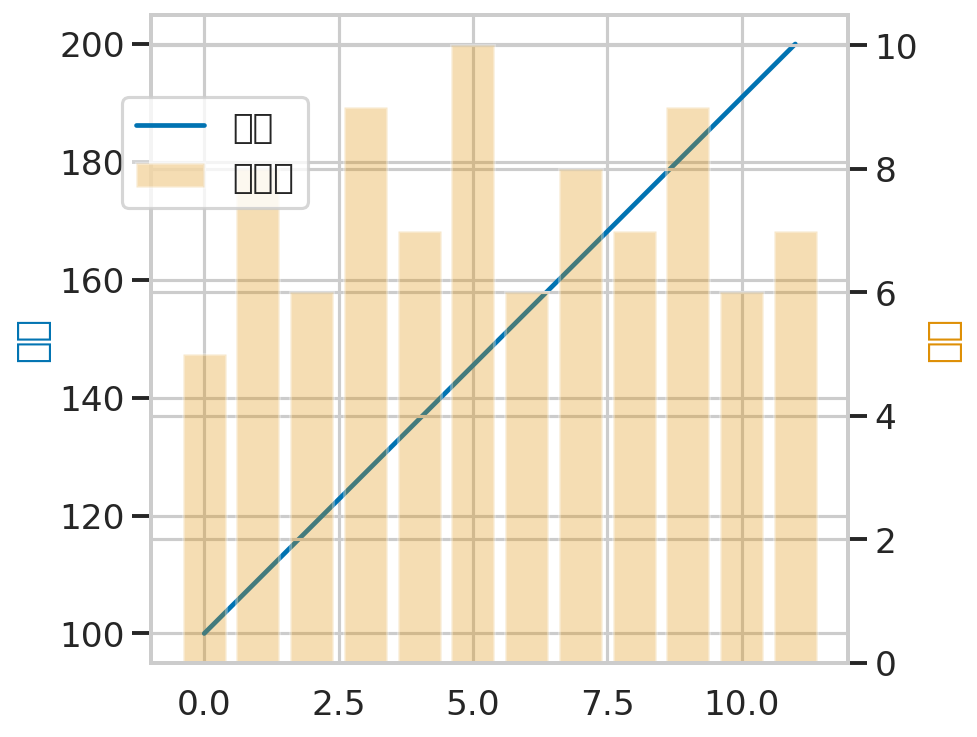

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(12)
y1 = np.linspace(100, 200, 12) # 매출(만원)
y2 = np.array([5, 8, 6, 9, 7, 10, 6, 8, 7, 9, 6, 7]) # 방문수(천명)

fig, ax1 = plt.subplots(dpi=150, layout='constrained')

# 보조축 생성
ax2 = ax1.twinx()

# 각 축에 데이터 플로팅
ax1.plot(x, y1, 'C0-', label='매출')
ax2.bar(x, y2, alpha=.3, color='C1', label='방문수')

# 각 축의 레이블 설정 (색상으로 구분)
ax1.set_ylabel('만원', color='C0')
ax2.set_ylabel('천명', color='C1')

# 범례를 하나로 합쳐서 표시
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()



---

## 24. 시계열 ④ - 이벤트 하이라이트/밴드

### 개념
- **맥락 제공**: 특정 이벤트가 발생한 시점이나 구간을 수직선(vline)이나 밴드(span)로 강조하여, 데이터 변화의 맥락을 제공합니다.
- **가독성 유지**: 하이라이트는 밝은 색이나 낮은 투명도(`alpha`)를 사용하여 원본 데이터의 가독성을 해치지 않도록 주의해야 합니다.
- **간결한 설명**: 툴팁이나 주석을 통해 해당 이벤트가 무엇인지 간결하게 설명합니다.

### 핵심 내용
- **Matplotlib**: `ax.axvline()` (수직선), `ax.axvspan()` (수직 밴드)을 사용하고, `ax.annotate()`와 `bbox` 옵션으로 주석을 추가합니다.
- **Plotly**: `fig.add_vrect()` (수직 밴드), `fig.add_hrect()` (수평 밴드)와 `fig.add_annotation()`을 사용합니다.
- **우선순위 표현**: 여러 이벤트가 겹칠 경우, 레이어 순서(`zorder`)나 투명도를 조절하여 우선순위를 표현할 수 있습니다.

### 코드 예제


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) DejaVu Sans.



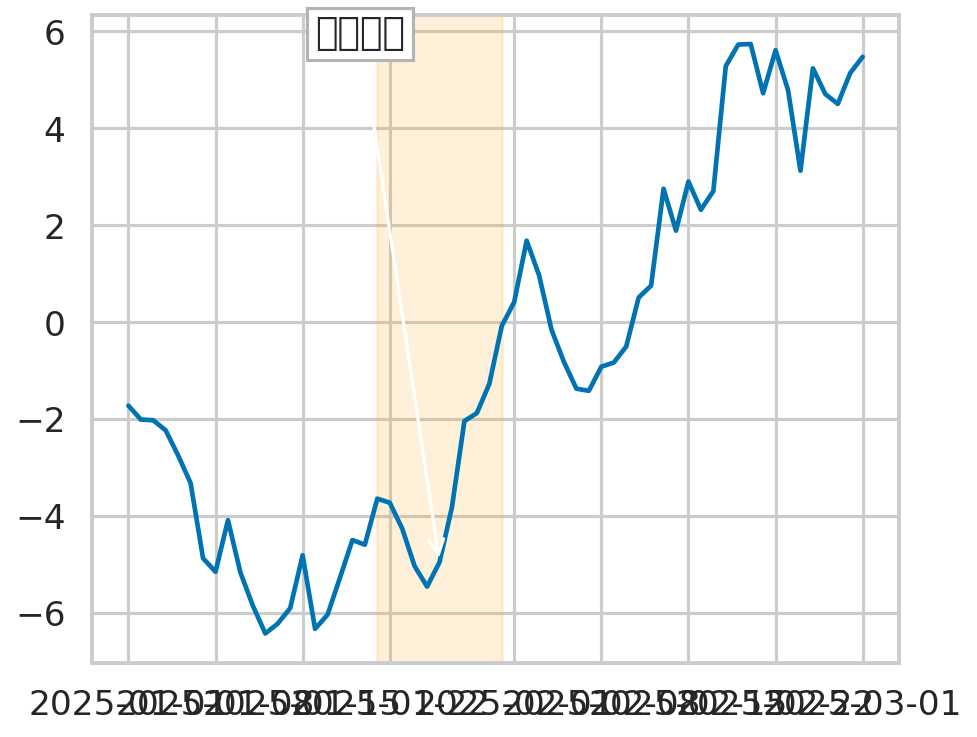

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 60일간의 시계열 데이터 생성
idx = pd.date_range('2025-01-01', periods=60, freq='D')
s = pd.Series(np.random.randn(60).cumsum(), index=idx)

fig, ax = plt.subplots(dpi=150, layout='constrained')
ax.plot(s.index, s)

# 특정 구간(20일~30일)을 주황색 반투명 밴드로 강조
ax.axvspan(idx[20], idx[30], color='orange', alpha=.15)

# 특정 지점(25일)에 주석 추가
ax.annotate('프로모션',
            xy=(idx[25], s.iloc[25]), # 주석이 가리킬 위치
            xytext=(idx[15], s.max()), # 텍스트 위치
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(fc='white', ec='0.7'))
plt.show()



---

## 25. 지도 시각화 - 스택 개요

### 개념
- **라이브러리 스택**:
    - **GeoPandas**: 지오메트리(도형) 처리와 정적 지도 플롯에 강점이 있습니다.
    - **Folium**: Leaflet.js 기반으로, 타일맵 위에 인터랙티브한 마커나 도형을 올리는 데 사용됩니다.
    - **Plotly**: Mapbox 토큰을 사용하여 고품질의 코로플레스(단계구분도)나 산점도 지도를 만듭니다.
    - **pydeck**: WebGL 기반으로 대용량(수백만 개)의 점/궤적 데이터를 부드럽게 렌더링하는 데 특화되어 있습니다.
- **사전 준비**: 정확한 시각화를 위해 좌표계(EPSG 코드), 투영 방식, 그리고 Mapbox 같은 서비스의 API 토큰을 사전에 준비해야 합니다.

### 핵심 내용
- **코로플레스(Choropleth)**: 행정구역 같은 경계 데이터(GeoJSON, Shapefile)와 통계 데이터를 조인할 때, 조인 키(예: 지역 코드)가 명확히 일치해야 합니다.
- **점/궤적 데이터**: 데이터 밀도가 높을 경우, 모든 점을 그리는 대신 클러스터링, 히트맵, 또는 경로 단순화를 통해 가독성을 확보해야 합니다.
- **도구 선택**: 간단한 마커 표시는 Folium, 복잡한 인터랙션과 통계 표현은 Plotly, 대용량 데이터 렌더링은 pydeck이 적합합니다.

### 코드 예제


In [38]:
# Folium: 간단한 지도에 마커 표시 후 HTML로 저장
import folium

# 서울 중심의 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 원형 마커 추가
folium.CircleMarker(
    [37.5665, 126.9780],
    radius=6,
    color='red',
    tooltip='Seoul'
).add_to(m)

# HTML 파일로 저장
m.save('map.html')

# Plotly 점 지도 예시 (Mapbox 토큰 필요)
# import plotly.express as px
# df = px.data.carshare()
# fig = px.scatter_mapbox(df, lat='centroid_lat', lon='centroid_lon', size='car_hours',
#                         color='peak_hour', zoom=10, mapbox_style='carto-positron')

# pydeck 궤적 지도 예시
# import pydeck as pdk
# path_layer = pdk.Layer('PathLayer', data=traj_df, get_path='path', ...)
# deck = pdk.Deck(layers=[path_layer], ...)



---

## 26. 지도 ① - 코로플레스 (Choropleth)

### 개념
- **단계구분도**: 행정구역(구, 시, 도)과 같은 지역 단위별로 특정 값(인구, 매출 등)의 크기를 색상의 농도로 인코딩하여 공간적 패턴을 보여주는 지도입니다.
- **데이터 조인**: 시각화하려는 통계 데이터와 지리 경계 데이터(GeoJSON, Shapefile)를 공통된 지역 코드(조인 키)를 기준으로 `merge`해야 합니다.
- **색상 스케일**: 연속적인 값은 `viridis` 같은 연속형 스케일을, 양수/음수처럼 중간값을 기준으로 나뉘는 값은 `RdBu` 같은 발산형 스케일을 사용합니다.

### 핵심 내용
- **결측 지역**: 통계 데이터가 없는 지역(결측)은 회색 같은 중립적인 색으로 처리하고, 범례에 해당 정책을 명시해야 합니다.
- **시인성 조정**: 지역 경계선의 색상과 두께, 채움색의 투명도를 조절하여 시인성을 높일 수 있습니다.
- **도구 선택**: 인터랙션이 필요하면 Plotly나 Folium을, 정적인 보고서용 이미지에는 GeoPandas/Matplotlib을 사용하는 것이 일반적입니다.

### 코드 예제


In [ ]:
# GeoPandas를 사용한 정적 코로플레스 예시 (파일 필요)
# import geopandas as gpd
# import pandas as pd

# # 1. 지리 경계 데이터와 통계 데이터 로드
# g = gpd.read_file('korea_gu.geojson') # geometry, GU_CODE 컬럼 포함
# val = pd.read_csv('metric_by_gu.csv') # GU_CODE, value 컬럼 포함

# # 2. 'GU_CODE'를 키로 두 데이터 병합
# m = g.merge(val, on='GU_CODE', how='left')

# # 3. 'value' 컬럼을 기준으로 지도 채색
# ax = m.plot(column='value', cmap='viridis', linewidth=.5, edgecolor='#333', legend=True)


# Plotly를 사용한 대화형 코로플레스 예시 (파일 필요)
# import plotly.express as px

# # m: GeoDataFrame
# fig = px.choropleth(m, geojson=m.__geo_interface__, locations=m.index, color='value',
#                     projection='mercator', color_continuous_scale='Viridis')
# # fitbounds="locations": 데이터가 있는 영역에 맞게 지도 줌
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()



---

## 27. 지도 ② - 점/궤적 지도

### 개념
- **분포와 흐름**: 포인트(사건 발생 위치, 상점 위치)나 경로(이동, 배송 궤적) 데이터를 지도 위에 투영하여 공간적 분포와 흐름을 파악합니다.
- **과밀 처리**: 포인트가 너무 많아 겹칠 경우(과밀), 클러스터링(마커 그룹화), 히트맵, 또는 투명도 조절을 통해 가독성을 확보해야 합니다.
- **시간 인코딩**: 시간 축이 있는 데이터의 경우, 시간에 따라 점의 색상이나 크기를 바꾸거나, 슬라이더를 이용한 애니메이션으로 시간적 변화를 표현하면 효과적입니다.

### 핵심 내용
- **Plotly**: `scatter_mapbox`는 사용이 간편하고, 툴팁, 줌, 범례 등 다양한 인터랙션을 손쉽게 제공합니다.
- **pydeck**: `ScatterplotLayer`, `PathLayer` 등을 사용하여 WebGL 기반의 고성능 렌더링으로 수백만 개 이상의 대용량 데이터를 부드럽게 처리할 수 있습니다.
- **Folium**: 타일맵 기반의 간단한 배포에 유리하며, `Map` 객체에 `CircleMarker`나 `PolyLine`을 추가하는 방식으로 구현합니다.

### 코드 예제


In [ ]:
# Plotly 점 지도 예시 (Mapbox 토큰 필요)
# import plotly.express as px
# df = px.data.carshare()
# fig = px.scatter_mapbox(df,
#                         lat='centroid_lat',
#                         lon='centroid_lon',
#                         size='car_hours',
#                         color='peak_hour',
#                         zoom=10,
#                         mapbox_style='carto-positron')
# fig.show()

# pydeck 궤적 지도 예시
# import pydeck as pdk
# # traj_df에 'path' 컬럼이 [[lon1, lat1], [lon2, lat2], ...] 형태로 존재해야 함
# path_layer = pdk.Layer('PathLayer',
#                        data=traj_df,
#                        get_path='path',
#                        get_color='[0, 128, 255]',
#                        width_min_pixels=3)
# deck = pdk.Deck(layers=[path_layer],
#                 initial_view_state=pdk.ViewState(latitude=37.5, longitude=127, zoom=10))
# deck.to_html('path_map.html')



---

## 28. Streamlit ① - 시작 & 페이지 설정

### 개념
- **빠른 웹앱 제작**: Streamlit은 순수 파이썬 스크립트만으로 데이터 과학 및 머신러닝을 위한 대화형 웹 대시보드/앱을 빠르게 만들 수 있는 프레임워크입니다.
- **반응형 레이아웃**: 기본적으로 반응형으로 동작하며, `st.set_page_config`를 통해 페이지의 전체적인 레이아웃(너비), 아이콘, 제목 등을 설정할 수 있습니다.
- **명령형 API**: 코드가 위에서 아래로 순차적으로 호출되면서 UI 요소들이 렌더링되는 직관적인 명령형 API 구조를 가집니다.

### 핵심 내용
- **앱 실행**: 터미널에서 `streamlit run app.py` 명령어로 앱을 실행합니다. 일반적으로 `layout='wide'`를 사용하여 넓은 레이아웃을 사용하는 것이 권장됩니다.
- **캐싱**: `@st.cache_data` 데코레이터를 함수 위에 추가하면, 함수의 입력 인자가 바뀌지 않는 한 결과를 캐싱하여 데이터 로딩이나 무거운 가공 비용을 절약하고 앱 반응 속도를 높일 수 있습니다.
- **차트 연동**: `st.pyplot`, `st.plotly_chart`, `st.altair_chart` 등의 명령어를 사용하여 Matplotlib, Plotly, Altair로 생성한 차트를 Streamlit 앱에 쉽게 렌더링할 수 있습니다.

### 코드 예제


In [40]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.3 MB/s eta 0:00:00


In [41]:
import streamlit as st
import pandas as pd
import numpy as np

# 페이지의 기본 설정을 지정 (가장 먼저 호출되어야 함)
st.set_page_config(page_title='시각화 데모', layout='wide')

st.title('데이터 시각화 데모')
st.write('사이드바에서 옵션을 선택하세요.')

# @st.cache_data: 이 함수의 결과는 캐싱됨
@st.cache_data
def load_data():
    # 50개의 행을 가진 데이터프레임 생성
    return pd.DataFrame({
        'x': range(50),
        'y': np.random.randn(50).cumsum()
    })

df = load_data()

# st.dataframe: 인터랙티브한 테이블 표시
st.dataframe(df, use_container_width=True)

2025-09-16 09:16:34.833 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:34.838 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:35.381 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-16 09:16:35.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:35.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:35.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:35.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()



---

## 29. Streamlit ② - 레이아웃(사이드바/컬럼/탭)

### 개념
- **레이아웃 구성**:
    - **`st.sidebar`**: 필터나 설정 옵션처럼 메인 콘텐츠와 분리하고 싶은 위젯들을 배치하는 사이드바 영역입니다.
    - **`st.columns`**: 화면을 여러 개의 수직 컬럼으로 분할하여 카드 형태의 지표나 차트를 나란히 배치할 때 사용합니다.
    - **`st.tabs`**: 여러 뷰(차트, 테이블, 로그 등)를 탭 형태로 분리하여 공간을 효율적으로 사용합니다.
- **동적 공간 제어**: `st.container`, `st.expander`(접기/펼치기), `st.empty` 등을 사용하여 동적으로 UI 요소를 그룹화하거나 표시/숨김 처리할 수 있습니다.

### 핵심 내용
- **컬럼 비율**: `st.columns([2, 1])`과 같이 리스트를 전달하여 각 컬럼의 너비 비율을 지정할 수 있습니다.
- **상태 변화와 재렌더링**: `placeholder.empty()`를 사용하면, 특정 위젯의 상태가 변했을 때 해당 위치의 내용을 지우고 새로운 내용으로 재렌더링할 수 있습니다.
- **성능**: 사용자의 입력에 따라 다시 실행되는 무거운 연산은 `@st.cache_data`로 캐싱하여, 불필요한 재계산으로 인한 깜빡임이나 지연을 줄여야 합니다.

### 코드 예제


In [42]:
# app_layout.py
import streamlit as st

st.set_page_config(layout='wide')

# 사이드바에 위젯 배치
with st.sidebar:
    st.header('필터')
    metric = st.selectbox('지표', ['A', 'B', 'C'])
    win = st.slider('윈도우', 3, 30, 7)

# 화면을 2:1 비율의 두 컬럼으로 분할
col1, col2 = st.columns([2, 1])

with col1:
    st.subheader('차트 영역')
    # (차트 렌더링 코드)

with col2:
    # st.metric: 주요 지표를 강조하여 표시
    st.metric('현재값', '1,234', '+3.2%')

# 탭 생성
tab1, tab2 = st.tabs(['테이블', '로그'])

with tab1:
    st.write('데이터 표')
    # (테이블 렌더링 코드)

with tab2:
    st.code('process done')

2025-09-16 09:16:44.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 09:16:44.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar



---

## 30. Streamlit ③ - 입력 위젯 & 차트 연동

### 개념
- **데이터 필터링**: `st.selectbox`, `st.slider`, `st.checkbox`, `st.date_input` 등 다양한 입력 위젯을 사용하여 사용자가 직접 데이터를 필터링하고 차트의 파라미터를 제어하게 할 수 있습니다.
- **상태 유지**: Streamlit은 상호작용 시마다 스크립트 전체를 재실행하지만, `st.session_state`를 사용하여 여러 재실행 간에 상태(state)를 유지할 수 있습니다.
- **차트 재사용**: 기존에 Matplotlib, Plotly, Altair로 작성했던 차트 생성 코드를 거의 그대로 가져와 Streamlit 앱 내에서 렌더링할 수 있어 재사용성이 높습니다.

### 핵심 내용
- **파일 업로드**: `st.file_uploader`로 업로드된 파일 객체를 받아 Pandas로 읽고, `@st.cache_data`로 처리하여 동일 파일 재업로드 시 재계산을 피합니다.
- **즉각적 피드백**: 필터링된 결과의 요약 지표(예: 필터링된 데이터 개수)는 `st.metric`으로 즉시 보여주어 사용자에게 피드백을 줍니다.
- **반응형 차트**: 차트를 렌더링할 때 `use_container_width=True` 옵션을 주면, 차트가 부모 컨테이너의 너비에 맞게 자동으로 조절되어 반응형 레이아웃을 쉽게 구현할 수 있습니다.

### 코드 예제


In [ ]:
# app_widgets.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px

st.set_page_config(layout='wide')

@st.cache_data
def mock_data():
    # ... (데이터 생성 로직)
    df = pd.DataFrame({
        'cat': np.random.choice(list('ABCDE'), 300),
        'x': np.arange(300),
        'y': np.random.randn(300).cumsum()
    })
    return df

df = mock_data()

# 사이드바에서 멀티셀렉트와 슬라이더 위젯 사용
sel = st.sidebar.multiselect('범주', sorted(df['cat'].unique()), default=['A', 'B'])
win = st.sidebar.slider('이동평균(window)', 3, 30, 7)

# 선택된 범주로 데이터 필터링
fil = df[df['cat'].isin(sel)].copy()

# 필터링된 데이터에 이동평균 계산
fil['y_ma'] = fil.groupby('cat')['y'].transform(lambda s: s.rolling(win, 1).mean())

# Plotly 차트 생성
fig = px.line(fil, x='x', y='y_ma', color='cat', title='이동평균')

# Streamlit에 차트 렌더링
st.plotly_chart(fig, use_container_width=True)



---

## 31. Streamlit ④ - 세션 상태 & 콜백

### 개념
- **상태 저장**: Streamlit은 기본적으로 스크립트를 재실행하지만, `st.session_state` 딕셔너리 객체를 사용하여 재실행 간에도 사용자 세션 동안 특정 값을 유지할 수 있습니다.
- **위젯과 상태 바인딩**: 위젯에 `key`를 지정하면, 해당 위젯의 값이 `st.session_state`에 자동으로 바인딩됩니다.
- **콜백(Callback)**: `on_change` 파라미터에 함수를 지정하면, 위젯의 값이 변경될 때마다 해당 콜백 함수가 실행되어 상태를 업데이트하거나 특정 로직을 수행할 수 있습니다.
- **초기화**: 세션 상태는 처음 한 번만 초기화해야 하므로, `if 'key' not in st.session_state:` 와 같은 "가드(guard)" 패턴을 사용합니다.

### 핵심 내용
- **깜빡임 줄이기**: 버튼이나 슬라이더 값 변경 시, 콜백 함수를 사용하여 파생되는 값을 미리 계산하고 `session_state`에 저장하면, 불필요한 재계산을 줄여 UI의 깜빡임을 줄일 수 있습니다.
- **상태 키 충돌 방지**: 여러 위젯에 걸쳐 `key`를 사용할 때는, 명시적인 접두사나 네임스페이스를 사용하여 키 이름의 충돌을 방지해야 합니다.
- **URL과 상태 동기화**: `st.query_params`를 사용하면 URL의 쿼리 파라미터와 세션 상태를 동기화하여, 특정 상태를 가진 페이지를 링크로 공유(딥링크)할 수 있습니다.

### 코드 예제


In [ ]:
# app_state.py
import streamlit as st

st.set_page_config(layout='wide')

# 세션 상태 초기화 (처음 한 번만 실행)
if 'count' not in st.session_state:
    st.session_state.count = 0

# 콜백 함수: 카운터를 1 증가시킴
def inc():
    st.session_state.count += 1

cols = st.columns(2)
with cols[0]:
    # 버튼 클릭 시 inc 콜백 함수 실행
    st.button('증가', on_click=inc)

with cols[1]:
    # number_input의 값을 'step'이라는 키로 세션 상태에 바인딩
    st.number_input('스텝', key='step', min_value=1, max_value=10, value=1)
    if st.button('스텝만큼 증가'):
        st.session_state.count += st.session_state.step

# 세션 상태에 저장된 카운터 값 표시
st.metric('카운터', st.session_state.count)



---

## 32. Streamlit ⑤ - 폼 & 유효성 검사

### 개념
- **입력 묶음 제출**: `st.form`은 여러 개의 입력 위젯들을 하나의 폼(form)으로 묶어, "제출" 버튼을 누를 때만 한 번에 모든 입력값을 서버로 보내고 스크립트를 재실행하게 합니다.
- **유효성 검사**: 폼이 제출되었을 때, 입력값들이 유효한지(필수값, 범위, 타입 등) 검사하고, 유효하지 않을 경우 `st.error`나 `st.warning`으로 사용자에게 오류 메시지를 보여줍니다.
- **폼 제출 버튼**: `st.form_submit_button`은 반드시 `st.form` 블록 내부에 위치해야만 동작합니다.

### 핵심 내용
- **검사 로직**: 필수 값 확인, 타입/범위 검증, 파일 확장자 체크 등 명시적인 유효성 검사 로직을 구현해야 합니다.
- **비싼 연산 방지**: 유효성 검사를 통과했을 때만 DB 쿼리나 API 호출 같은 비용이 비싼 연산을 실행하고, 그 결과를 캐시하여 성능을 최적화합니다.
- **상태 재사용**: 폼 내부의 입력 위젯에 `key`를 지정하면, 해당 값들이 `session_state`에 저장되어 다른 곳에서도 재사용할 수 있습니다.

### 코드 예제


In [ ]:
# app_form.py
import streamlit as st

# 'filter_form'이라는 이름의 폼 생성
with st.form('filter_form'):
    city = st.selectbox('도시', ['Seoul', 'Busan', 'Incheon'])
    thr = st.number_input('최소 매출', min_value=0, value=100)

    # 폼 제출 버튼
    submitted = st.form_submit_button('조회')

# 제출 버튼이 눌렸을 때만 아래 로직 실행
if submitted:
    # 유효성 검사
    if thr <= 0:
        st.error('최소 매출은 0보다 커야 합니다.')
    else:
        st.success(f'{city} / {thr} 이상 조건으로 조회합니다.')
        # do_query(city, thr) # 실제 쿼리 실행



---

## 33. Streamlit ⑥ - 데이터 표시 & 편집

### 개념
- **`st.dataframe`**: 가상 스크롤, 정렬, 필터링 등 기본적인 UI를 제공하는 인터랙티브한 테이블을 표시합니다.
- **`st.data_editor`**: `st.dataframe`의 기능에 더해, 사용자가 직접 테이블의 값을 인라인으로 편집하거나 행을 추가/삭제할 수 있는 기능을 제공합니다. 검증 옵션도 포함됩니다.
- **대용량 데이터 처리**: 서버에서 데이터를 미리 집계하거나, 페이징/다운샘플링하여 클라이언트로 전송되는 데이터의 양을 줄여야 앱의 반응성을 유지할 수 있습니다.

### 핵심 내용
- **반응형 폭**: `use_container_width=True` 옵션을 주면, 테이블이 부모 컨테이너의 너비에 꽉 차게 표시되어 반응형 레이아웃에 유리합니다.
- **컬럼 설정**: `column_config` 파라미터에 딕셔너리 형태로 각 컬럼의 포맷(예: 숫자, 날짜), 라벨, 기본값 등을 일괄적으로 지정할 수 있습니다.
- **편집 결과 수집**: `st.data_editor`는 편집된 결과를 새로운 DataFrame으로 반환하며, 이 값을 세션 상태에 저장하여 다른 곳에서 활용할 수 있습니다.

### 코드 예제


In [ ]:
# app_table.py
import streamlit as st
import pandas as pd

df = pd.DataFrame({
    '상품': ['A', 'B', 'C'],
    '가격': [1200, 3400, 2850],
    '재고': [10, 5, 0]
})

st.dataframe(df, use_container_width=True)

# 데이터 편집기
edited = st.data_editor(
    df,
    num_rows='dynamic',  # 행 추가/삭제 허용
    use_container_width=True,
    column_config={
        # '가격' 컬럼은 숫자 포맷을 '원' 단위로 지정
        '가격': st.column_config.NumberColumn(format='%d원'),
        # '재고' 컬럼은 최소값을 0으로 제한
        '재고': st.column_config.NumberColumn(min_value=0)
    }
)

if st.button('변경 저장'):
    st.write(edited) # 편집된 결과 출력



---

## 34. Streamlit ⑦ - 파일 업로드·다운로드

### 개념
- **파일 업로드**: `st.file_uploader`를 사용하여 사용자가 로컬 컴퓨터에서 CSV, XLSX, JSON 등의 파일을 업로드하고, 이를 서버에서 처리할 수 있습니다.
- **캐싱 및 변환**: 업로드된 파일은 처리 후 결과를 캐시하여 재사용하고, 변환된 결과물(예: 필터링된 데이터)은 `st.download_button`을 통해 사용자에게 제공합니다.
- **보안/용량 고려**: 서버 측에서 임시 파일의 저장 경로, 용량 제한, 보안 정책 등을 명확히 정의해야 합니다.

### 핵심 내용
- **입력 검증**: 업로드된 파일의 확장자, 헤더(컬럼명), 인코딩, 구분자 등을 검증하는 로직을 포함해야 합니다.
- **다운로드 데이터 생성**: 다운로드할 데이터는 `bytes` 또는 스트림(stream) 형태로 생성하고, `file_name`과 `mime` 타입을 명확히 지정해야 합니다.

### 코드 예제


In [ ]:
# app_io.py
import streamlit as st
import pandas as pd
import io

# 파일 업로더 위젯
up = st.file_uploader('CSV 업로드', type=['csv'])

if up is not None:
    df = pd.read_csv(up)
    st.dataframe(df.head(), use_container_width=True)

    # 다운로드용 데이터 준비
    buf = io.StringIO()
    (df.head(100)).to_csv(buf, index=False)

    # 다운로드 버튼
    st.download_button(
        label='상위 100행 CSV 다운로드',
        data=buf.getvalue(),
        file_name='sample_top100.csv',
        mime='text/csv'
    )



---

## 35. Streamlit ⑧ - 캐싱 & 리소스 관리

### 개념
- **캐싱**:
    - `@st.cache_data`: 데이터 로딩, 변환 등 함수의 **결과(데이터)**를 캐시합니다. 반환값이 직렬화 가능해야 합니다.
    - `@st.cache_resource`: DB 커넥션, ML 모델 등 클라이언트/세션 간에 **공유되어야 할 리소스**를 캐시합니다.
- **캐시 무효화**: 캐시는 함수의 입력 파라미터, TTL(Time To Live), 또는 수동 버튼 클릭(`st.cache_data.clear()`)으로 제어하고 무효화할 수 있습니다.
- **진행 표시**: `st.spinner`나 `st.progress`를 사용하여 시간이 걸리는 작업의 진행 상태를 사용자에게 보여주어 UX를 향상시킵니다.

### 핵심 내용
- **리소스 관리**: 외부 API나 DB 커넥션은 `@st.cache_resource`로 감싸서 불필요한 연결 비용을 절감합니다.
- **중간 결과 캐싱**: 대용량 연산의 중간 결과를 캐시하고, 필요 시 명시적으로 `clear()`를 호출하여 메모리를 관리합니다.
- **의존성 문서화**: 캐시의 유효성에 영향을 미치는 요소(라이브러리 버전, 환경 변수 등)를 메타데이터로 문서화하여 관리합니다.

### 코드 예제


In [ ]:
# app_cache.py
import streamlit as st
import time

# 리소스 캐싱 (예: DB 커넥션 객체)
@st.cache_resource
def get_client():
    time.sleep(1) # 연결 비용 시뮬레이션
    return {'name': 'mock_client'}

# 데이터 캐싱 (ttl: 600초, spinner 비활성화)
@st.cache_data(ttl=600, show_spinner=False)
def heavy_computation(x: int):
    time.sleep(2) # 무거운 연산 시뮬레이션
    return x ** 2

st.write(get_client())
val = st.number_input('입력', 0, 100, 12)

# 스피너로 진행 상태 표시
with st.spinner('계산 중...'):
    out = heavy_computation(val)

st.success(f'결과: {out}')

if st.button('캐시 비우기'):
    st.cache_data.clear()
    st.cache_resource.clear()
    st.info('캐시를 비웠습니다.')



---

## 36. Streamlit 차트 연동 ① - Matplotlib · Seaborn

### 개념
- **`st.pyplot(fig)`**: Matplotlib이나 Seaborn으로 생성한 Figure 객체(`fig`)를 Streamlit 앱에 그대로 렌더링합니다.
- **반복 렌더링**: 루프 안에서 차트를 반복적으로 렌더링할 때는, `clear_figure=True` 옵션을 주거나 매번 새로운 Figure 객체를 생성하여 이전 차트가 겹쳐 그려지는 것을 방지해야 합니다.
- **전역 설정**: 캔버스의 폭은 컨테이너에 맞추고, DPI나 폰트 등은 `rcParams`를 통해 전역으로 설정하는 것이 편리합니다.

### 핵심 내용
- **객체 관리**: Seaborn은 내부적으로 Matplotlib을 사용하므로, `sns.lineplot()` 등이 반환하는 `ax` 객체나 `FacetGrid`가 반환하는 `Figure` 객체를 명시적으로 변수에 받아 관리하는 것이 좋습니다.
- **그리드 배치**: 여러 차트는 `st.columns`를 사용하여 그리드 형태로 배치하고, 범례는 하나로 통합하여 깔끔하게 관리할 수 있습니다.
- **성능**: 큰 데이터를 직접 그리면 성능이 저하되므로, 서버에서 미리 데이터를 집계하거나 샘플링한 후 그 결과를 차트로 그려 성능과 가독성을 동시에 확보해야 합니다.

### 코드 예제


In [ ]:
# app_chart_mpl.py
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

# Matplotlib Figure 객체 생성
fig, ax = plt.subplots(figsize=(6, 3.2), dpi=150)

# Seaborn으로 차트 그리기 (ax 객체에 그려짐)
sns.lineplot(x=range(50), y=[i**0.5 for i in range(50)], ax=ax)
ax.set(title='루트 성장', xlabel='t', ylabel='sqrt(t)')

# Streamlit에 Figure 객체 렌더링
st.pyplot(fig, clear_figure=True)



---

## 37. Streamlit 차트 연동 ② - Plotly · Altair · pydeck

### 개념
- **대화형 차트 출력**: Plotly, Altair, pydeck으로 생성한 대화형 차트는 각각 `st.plotly_chart`, `st.altair_chart`, `st.pydeck_chart` 명령어로 출력합니다.
- **컨테이너 폭 대응**: `use_container_width=True`를 기본 옵션으로 사용하여, 차트가 앱의 레이아웃(컬럼 등) 너비에 자동으로 맞춰지도록 하는 것이 편리합니다.
- **고성능 렌더링**: 지도, 3D, 대용량 데이터 시각화는 WebGL 기반의 pydeck을 사용하여 부드러운 렌더링 경험을 제공할 수 있습니다.

### 핵심 내용
- **Plotly**: `fig.update_layout`으로 여백, 범례, 폰트 등 차트의 전반적인 레이아웃을 일괄적으로 제어합니다.
- **Altair**: `.interactive()` 메서드를 호출하여 줌/팬/브러시 등 인터랙션 기능을 손쉽게 추가할 수 있습니다.
- **pydeck**: 초기 뷰 상태(`ViewState`: 위경도, 줌 레벨)와 데이터를 표현할 레이어(`ScatterplotLayer`, `PathLayer`, `HexagonLayer` 등)를 설계하는 것이 핵심입니다.

### 코드 예제


In [ ]:
# app_chart_interactive.py
import streamlit as st
import plotly.express as px
import altair as alt
import pandas as pd

# --- Plotly ---
df_gap = px.data.gapminder().query("year == 2007")
fig_plotly = px.scatter(df_gap, x='gdpPercap', y='lifeExp', color='continent')
st.plotly_chart(fig_plotly, use_container_width=True)

# --- Altair ---
df_cars = pd.DataFrame({'hp': [100, 120, 150, 200], 'mpg': [30, 27, 25, 20], 'brand': ['A', 'B', 'C', 'D']})
chart_altair = (
    alt.Chart(df_cars).mark_circle(size=60)
    .encode(x='hp', y='mpg', color='brand', tooltip=['brand'])
    .properties(height=280)
    .interactive()
)
st.altair_chart(chart_altair, use_container_width=True)



---

## 38. 성능 팁 - 다운샘플·집계·Datashader

### 개념
- **정보량 조절**: 한 픽셀에 여러 개의 데이터 포인트가 그려지는 것은 정보의 중복이므로, 시각화하기 전에 데이터의 양을 화면에 표시될 정보량에 맞게 줄여야 합니다.
- **변환 방법**:
    - **리샘플(Resample)**: 시계열 데이터의 시간 축을 더 큰 단위로 집계합니다. (예: 1초 → 1분)
    - **산점도 집계**: 산점도는 2D 히스토그램이나 헥스빈(hexbin)으로 변환하여 밀도를 표현합니다.
- **대용량 처리 스택**: `Datashader` → `HoloViews` → `hvPlot`으로 이어지는 스택은 대용량 데이터를 서버 사이드에서 렌더링하여, 클라이언트(브라우저)의 부담을 최소화하는 효과적인 방법입니다.

### 핵심 내용
- **간단한 다운샘플링**: `df.iloc[::N]` 형태로 N번째 행마다 데이터를 추출하거나, 그룹별 대표값(최대, 최소, 평균 등)을 사용하는 것이 가장 간단한 방법입니다.
- **스트리밍 데이터**: 실시간으로 들어오는 데이터는 슬라이딩 윈도우를 적용하여 최근 N개의 포인트만 표시하도록 제한합니다.
- **서버-클라이언트 부하 분산**: 서버에서 미리 데이터를 집계하여 이미지나 경량화된 데이터만 클라이언트로 전달하면, 렌더링 비용을 크게 줄일 수 있습니다.

### 코드 예제


In [ ]:
import pandas as pd
import numpy as np

n = 2_000_000
s = pd.Series(np.random.randn(n)).cumsum()

# 1) 간단한 다운샘플링 (1/100 추출)
s_ds = s.iloc[::100]

# 2) 시계열 리샘플링 (초 → 분)
idx = pd.date_range('2025-01-01', periods=n, freq='S')
ts = pd.Series(np.random.randn(n), index=idx).cumsum()
# 1분(1min) 단위로 최소, 최대, 평균값 집계
minute = ts.resample('1min').agg(['min', 'max', 'mean'])

# 3) Datashader/hvPlot 스택 (설치 필요)
# import hvplot.pandas
# ts.hvplot(datashade=True) # datashade=True 옵션으로 서버사이드 렌더링 활성화



---

## 39. Streamlit - 멀티페이지 & 설정

### 개념
- **멀티페이지 앱**: 프로젝트 루트 디렉토리 아래에 `pages/` 폴더를 만들고, 그 안에 파이썬 스크립트 파일을 넣으면 자동으로 사이드바에 멀티페이지 네비게이션이 생성됩니다.
- **전역 설정**: `.streamlit/config.toml` 파일을 생성하여 앱의 전역 테마(기본/다크 모드), 메뉴 항목, 헤더 등을 제어할 수 있습니다.
- **페이지 간 상태 공유**: `st.session_state`를 사용하면, 사용자가 다른 페이지로 이동하더라도 세션 동안 상태(예: 로그인 정보, 선택된 필터 값)를 유지할 수 있습니다.

### 핵심 내용
- **메뉴 순서 제어**: `1_대시보드.py`, `2_탐색.py`처럼 파일명 앞에 숫자를 붙여 사이드바 메뉴의 순서를 제어할 수 있습니다.
- **테마 변수**: `config.toml`에서 `base`, `primaryColor`, `font` 등의 변수를 설정하여 앱의 기본/다크 모드, 주요 색상, 폰트 등을 지정할 수 있습니다.
- **캐시 활용**: 페이지를 전환할 때마다 실행되는 비싼 연산(DB 조회, 모델 로딩 등)은 캐시(`@st.cache_data`, `@st.cache_resource`)를 활용하여 중복 실행을 피해야 합니다.

### 코드 예제


In [ ]:
# 프로젝트 구조 예시
# app.py (메인 페이지)
# pages/
#   ├── 1_대시보드.py
#   ├── 2_탐색.py
#   └── 3_지도.py

# .streamlit/config.toml 예시
"""
[theme]
base = "light"
primaryColor = "#1f77b4"
font = "sans serif"
"""



---

## 40. 보안·시크릿·배포 베스트 프랙티스

### 개념
- **시크릿 관리**: API 키, DB 접속 정보, 토큰 등 민감한 정보는 코드에 직접 작성하지 말고, 시크릿 관리 도구나 환경 변수를 통해 안전하게 관리해야 합니다.
- **의존성 고정**: `requirements.txt`나 `pyproject.toml`에 라이브러리 버전을 명시적으로 고정(pinning)하여, 배포 환경에 관계없이 동일한 환경에서 앱이 실행되도록 보장합니다.
- **배포 환경 분리**: 개발 환경과 배포 환경(Community Cloud, 사내 서버, Docker 등)에 맞는 설정을 분리하여 관리합니다.

### 핵심 내용
- **Streamlit 시크릿**: `.streamlit/secrets.toml` 파일에 민감한 정보를 저장하고, 코드 내에서는 `st.secrets['KEY']` 형태로 안전하게 접근합니다. 이 파일은 Git에 포함시키면 안 됩니다.
- **민감 데이터 마스킹**: 로그나 에러 메시지에 API 키나 개인정보 같은 민감 데이터가 노출되지 않도록 마스킹 처리를 해야 합니다.
- **최소 권한 부여**: CDN, 이미지, 지도 서비스 등에 사용되는 토큰은 해당 프로젝트나 사용자 범위에만 접근할 수 있도록 최소한의 권한을 부여하여 발급받아야 합니다.

### 코드 예제


In [ ]:
# .streamlit/secrets.toml (배포 환경에만 저장, Git에 포함 금지)
"""
MAPBOX_TOKEN = "pk.eyJ..."
API_URL = "https://api.example.com"
"""

# 사용 예시 (app.py)
import streamlit as st
import requests

# secrets.toml에 저장된 값에 접근
api_url = st.secrets['API_URL']
# resp = requests.get(api_url + '/health')
# st.write(resp.status_code)


# requirements.txt 예시 (버전 고정)
# streamlit==1.36.0
# plotly==5.22.0
# altair==5.3.0
# seaborn==0.13.2
# matplotlib==3.9.0